In [1]:
cd

C:\Users\56961


In [2]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [3]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_5328\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [4]:

# cargar librerias
from scipy import stats



# definir librerias
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
import csv

import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import io

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')


C:\Users\56961\AppData\Local\Temp\ipykernel_5328\1572372819.py:33: UserWarning: DelftStack
  warnings.warn('DelftStack')


# Cargar grafo twitch

In [5]:
name_grafo="datos grafos reales/pickle/grafo_twitch_gamers"
file = open(name_grafo, 'rb')
# dump information to that filea
G= pickle.load(file)
#close the file
file.close()

In [6]:
print("Cantidad de nodos del grafo:",len(G.nodes),"\n")
print("Cantidad de aristas del grafo:",len(G.edges),"\n")
print("Propoción de aristas en coomparación con |V|^2:",len(G.edges)/(len(G.nodes)**2),"\n")
print("Porcentaje de aristas en coomparación con |V|^2:",len(G.edges)/(len(G.nodes)**2) *100 ,"% \n")
print("Grado promedio:",len(G.edges)/len(list(G.nodes())),"\n")
print("El grafo es conexo:" ,nx.is_connected(G),"\n")

Cantidad de nodos del grafo: 168114 

Cantidad de aristas del grafo: 6797557 

Propoción de aristas en coomparación con |V|^2: 0.0002405166215127396 

Porcentaje de aristas en coomparación con |V|^2: 0.02405166215127396 % 

Grado promedio: 40.43421130899271 

El grafo es conexo: True 



# Grafica distribución de grados del grafo

Grafica distribución de grados del grafo guardado en G:

In [8]:
dic_grados_G=dict(G.degree( list(G.nodes()) ))

dist_pob=[]
for x_i in list(G.nodes()):
    di=dic_grados_G[x_i]
    dist_pob.append(di)
    
dist_pob.sort()    

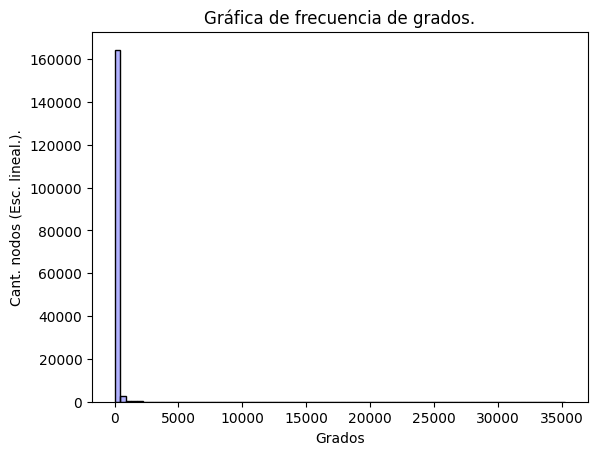

In [13]:
num_bins=80           
plt.hist(dist_pob, bins=num_bins, density=False, edgecolor='none', alpha=0.3, fill=True,color="blue",label="dict_name_sample[tipo_sample]", log=False)
plt.hist(dist_pob, bins=num_bins, density=False, edgecolor='black', alpha=1, fill=False,label="Dist grados poblacional.", log=False)        
plt.grid()

# Personalizar la gráfica
plt.title("Gráfica de frecuencia de grados.")
plt.xlabel('Grados')
plt.ylabel('Cant. nodos (Esc. lineal.).')
plt.grid()
plt.show()

Text(0, 0.5, 'Cant. nodos (Esc. Log.).')

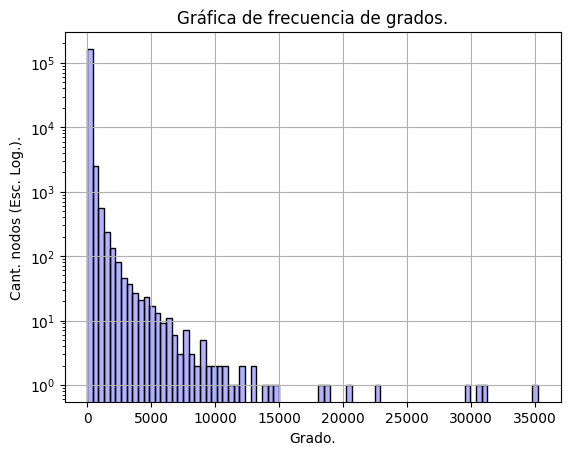

In [12]:
num_bins=80           
plt.hist(dist_pob, bins=num_bins, density=False, edgecolor='none', alpha=0.3, fill=True,color="blue",label="dict_name_sample[tipo_sample]", log=True)
plt.hist(dist_pob, bins=num_bins, density=False, edgecolor='black', alpha=1, fill=False,label="Dist grados poblacional.", log=True)        
plt.grid()

# Personalizar la gráfica
plt.title("Gráfica de frecuencia de grados.")
plt.xlabel('Grado.')
plt.ylabel('Cant. nodos (Esc. Log.).')

Text(0, 0.5, 'Densidad de frecuencia de grados (Esc. Log.)')

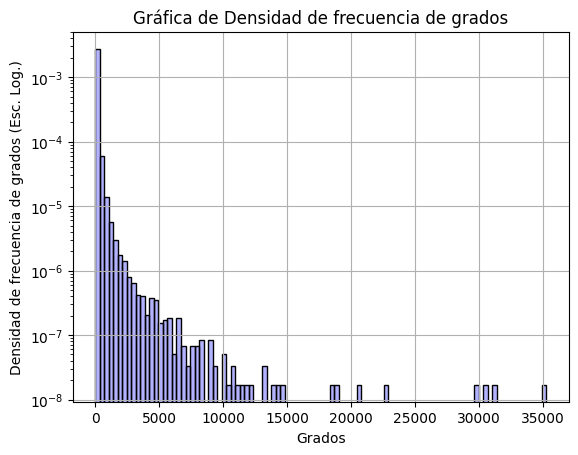

In [11]:
num_bins=100            
plt.hist(dist_pob, bins=num_bins, density=True, edgecolor='none', alpha=0.3, fill=True,color="blue",label="dict_name_sample[tipo_sample]", log=True)
plt.hist(dist_pob, bins=num_bins, density=True, edgecolor='black', alpha=1, fill=False,label="Dist grados poblacional.", log=True)        
plt.grid()

# Personalizar la gráfica
plt.title('Gráfica de Densidad de frecuencia de grados')
plt.xlabel('Grados')
plt.ylabel('Densidad de frecuencia de grados (Esc. Log.)')

Text(0, 0.5, 'Frecuencia (Esc. Log.).')

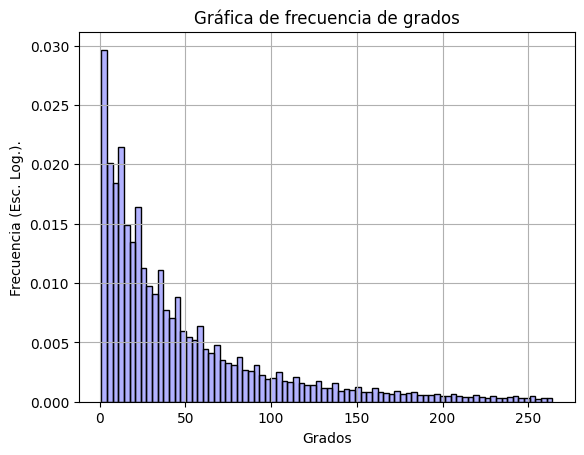

In [33]:
num_bins=80 
porc_nodos=0.95
cant_nodos_muestreados=int(len(dist_pob) *porc_nodos)
plt.hist(dist_pob[:cant_nodos_muestreados], bins=num_bins, density=True, edgecolor='none', alpha=0.3, fill=True,color="blue",label="dict_name_sample[tipo_sample]", log=False)        
plt.hist(dist_pob[:cant_nodos_muestreados], bins=num_bins, density=True, edgecolor='black', alpha=1, fill=False,label="Dist grados poblacional.", log=False)        
plt.grid()

# Personalizar la gráfica
plt.title('Gráfica de frecuencia de grados')
plt.xlabel('Grados')
plt.ylabel('Frecuencia (Esc. Log.).')

In [12]:
def dist_degree_pob_N_V(nodos_G,dict_nei_G,dic_grados_G):

    dist_Nei_pob=[]
    for v in nodos_G:
        nei_v=dict_nei_G[v]
        dist_Nei_v=[]
        for u in nei_v:
            d_u=dic_grados_G[u]
            dist_Nei_v.append(d_u)
        dist_Nei_pob.extend(dist_Nei_v)

    dist_degree_pob=[]
    for v in nodos_G:
        d_v=dic_grados_G[v]
        dist_degree_pob.append(d_v)
    return dist_Nei_pob,dist_degree_pob

In [38]:
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

dist_Nei_pob,dist_degree_pob=dist_degree_pob_N_V(nodos_G,dict_nei_G,dic_grados_G) # calcular la distribucion de grados poblacional y de N(V(G))

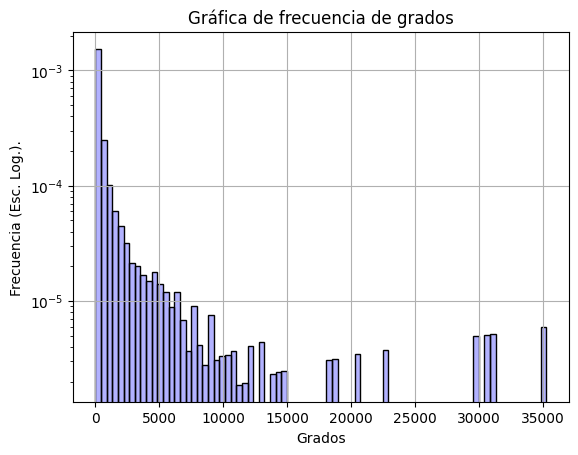

In [41]:
num_bins=80 
plt.hist(dist_Nei_pob, bins=num_bins, density=True, edgecolor='none', alpha=0.3, fill=True,color="blue",label="dict_name_sample[tipo_sample]", log=True)        
plt.hist(dist_Nei_pob, bins=num_bins, density=True, edgecolor='black', alpha=1, fill=False,label="Dist grados poblacional.", log=True)        

# Personalizar la gráfica
plt.title('Gráfica de frecuencia de grados')
plt.xlabel('Grados')
plt.ylabel('Frecuencia (Esc. Log.).')
plt.grid()

# Cargar  data frame con los resultados de la experimentación.

In [7]:
name_df="data frame/df_resumen_exp_reales"
file = open(name_df, 'rb')
df_experimentacion= pickle.load(file)
file.close()

df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("PIMPLE", "PIMLE")
df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("EMV", "MLE")
df_experimentacion

df_experimentacion.head(2)

Id_sample  Etiqueta H Tipo_sample_p_gral  Porc_nodos_muestra   
0          0  views<=520                  5                0.01  \
1          0  views<=520                  5                0.01   

  Num_metodo_est  Valor_Estimado  Valor_error(Exac - Est)   
0          PIMLE    17457.068133              -942.068133  \
1            MLE    17314.057061              -799.057061   

   Valor_error_rel(Exac - Est)  
0                    -0.057043  
1                    -0.048384

In [8]:
def graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend):
    #l_color=[27, 79, 114 ,40, 116, 166 ,46, 134, 193 ,133, 193, 233,230, 176, 170,217, 136, 128 ,169, 50, 38,100, 30, 22 ]
    #l_color=[254, 0, 0,254, 58, 0, 23, 0, 254,20, 90, 50 ,112, 123, 124]
    
    #vec_color=np.array(l_color)/255
    #l_colores=[]
    #for j in range(int(len(l_color)/3)):
    #    l_colores.append(tuple(vec_color[j*3:j*3+3]))
        
    size_sample=0.1
    cond=df_grupo["Porc_nodos_muestra"]==size_sample
    df_size=df_grupo[cond]
    
    cant_colums=len(Tipo_sample_p_gral)
    dict_num_colum_to__type_sample={u:v for u,v in zip(range(cant_colums),Tipo_sample_p_gral)}

    cant_graficas=len(L_met_est)
    dict_num_grafica_to_est={u:v for u,v in zip(range(cant_graficas),L_met_est)}
    #Lalfa=[0.5,0.5,0.95,0.95,0.95]
    Lalfa=[0.5,0.5,1,1,1]    
    dict_met_to_alfa={u:v for u,v in zip(L_met_est,Lalfa)}

    fig, axes = plt.subplots(1,cant_colums, figsize=size_figure, sharex=False, sharey=False)    
    
    for num_col in range(cant_colums):     # L_met_est
        met_sample=dict_num_colum_to__type_sample[num_col]
        cond_1=df_size["Tipo_sample_p_gral"]==met_sample  # num_col ok
        df_col=df_size[cond_1]
        #print(num_row,num_col)

        for grafica_i in range(cant_graficas): # L_prop_sample

            metodo_est=dict_num_grafica_to_est[grafica_i]
            cond_3=df_col["Num_metodo_est"]==metodo_est  # grafica_i
            df_datos=df_col[cond_3]
            
            PAlfa=dict_met_to_alfa[metodo_est]
            datos_i=list(df_datos["Valor_error_rel(Exac - Est)"])
            label_name=metodo_est+"."
            #sns.kdeplot(datos_i,bw=0.3, label=label_name, lw=1.5,log_scale=False,alpha=PAlfa,ax=axes[num_col],color=l_colores[grafica_i])
            sns.kdeplot(datos_i,bw=0.3, label=label_name, lw=1.5,log_scale=False,alpha=PAlfa,ax=axes[num_col])            
            
            #linea
            if "RDS_I"==metodo_est:
                line = axes[num_col].get_lines()[-1]# Obtén la línea del gráfico actual
                line.set_linestyle(":")# Cambia el estilo de la línea a punteado

            axes[num_col].set_ylim(l_ylim)
            axes[num_col].set_xlim(l_xlim)            
            axes[num_col].grid(True)
            

        xlabel="Error relativo"
        axes[num_col].set_xlabel(xlabel,fontsize=10) 
        ylabel="Dens. Error relativo."
        axes[num_col].set_ylabel(ylabel,fontsize=10)      
        titulo="Err. rel v/s muestra tipo "+str(met_sample)+"."
        axes[num_col].set_title(titulo,fontsize=10) 
        
        if act_legend:
            #axes[num_col].legend(loc='upper right',fontsize=6, title ='Tipo de método:', framealpha=0.5)
            axes[num_col].legend(loc='upper right',fontsize=9, framealpha=0.5)            
            #axes[num_col].legend.get_frame().set_alpha(0.7)  # Ajustar la transparencia del cuadro de la leyenda
#            for text in legend.get_texts():
#                text.set_alpha(0.7)  # Ajustar la transparencia del texto de las etiquetas de la leyenda
    plt.tight_layout()                            

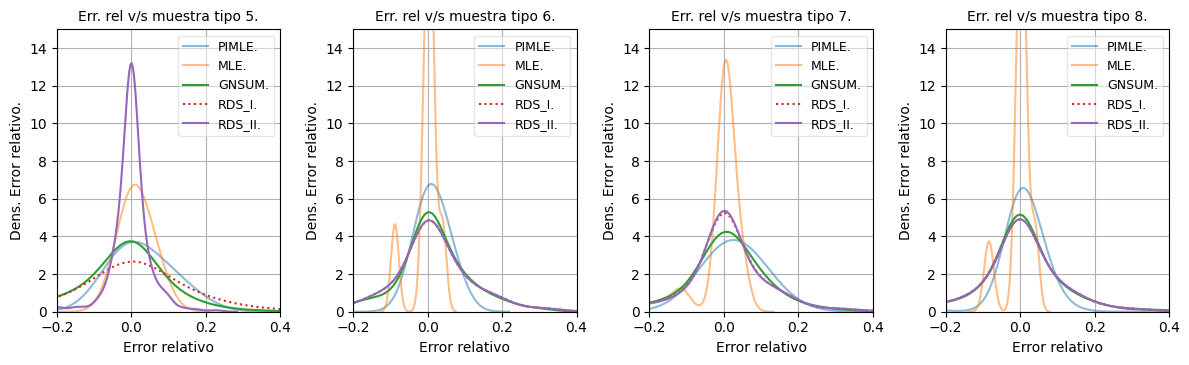

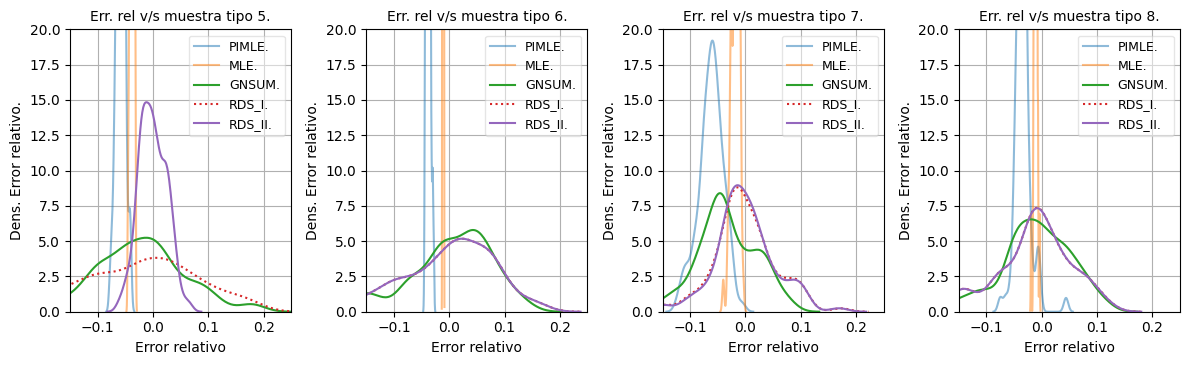

In [16]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE", "MLE","GNSUM"]

delta=0.1
l_ylim=[0,15]
l_xlim=[-0.3+delta,0.3+delta]
act_legend=True

df_grupo=df_experimentacion
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)


size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE"]
delta=0.05
l_ylim=[0,20]
l_xlim=[-0.2+delta,0.2+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=0
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

# Resultados general de las estimaciones

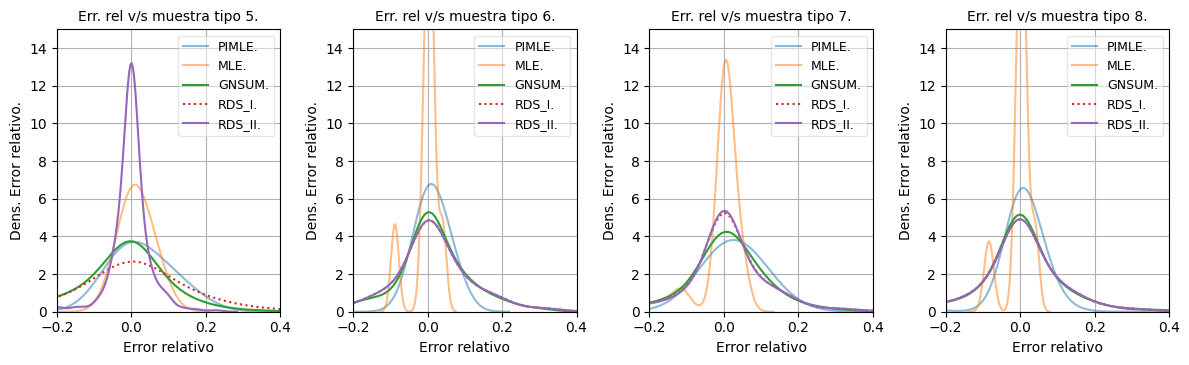

In [10]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE", "MLE","GNSUM"]

delta=0.1
l_ylim=[0,15]
l_xlim=[-0.3+delta,0.3+delta]
act_legend=True

df_grupo=df_experimentacion
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

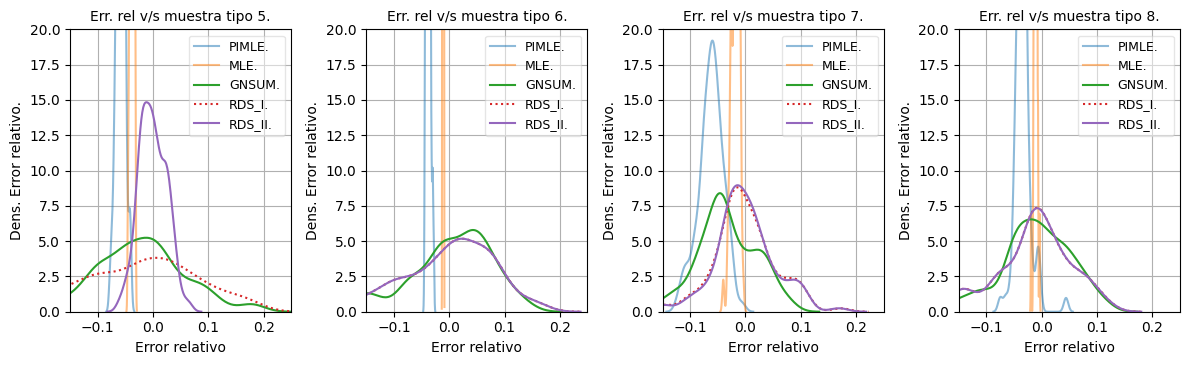

In [11]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE"]
delta=0.05
l_ylim=[0,20]
l_xlim=[-0.2+delta,0.2+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=0
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

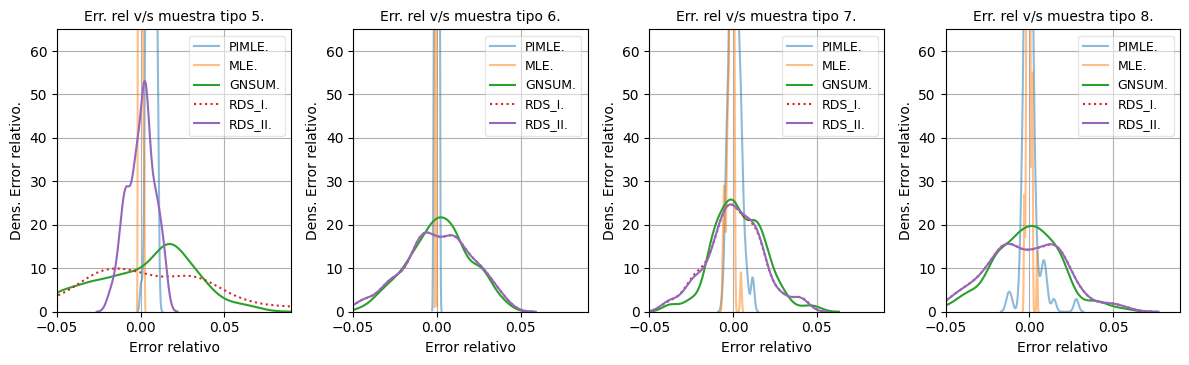

In [201]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE"]
delta=0.02
l_ylim=[0,65]
l_xlim=[-0.07+delta,0.07+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=1
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

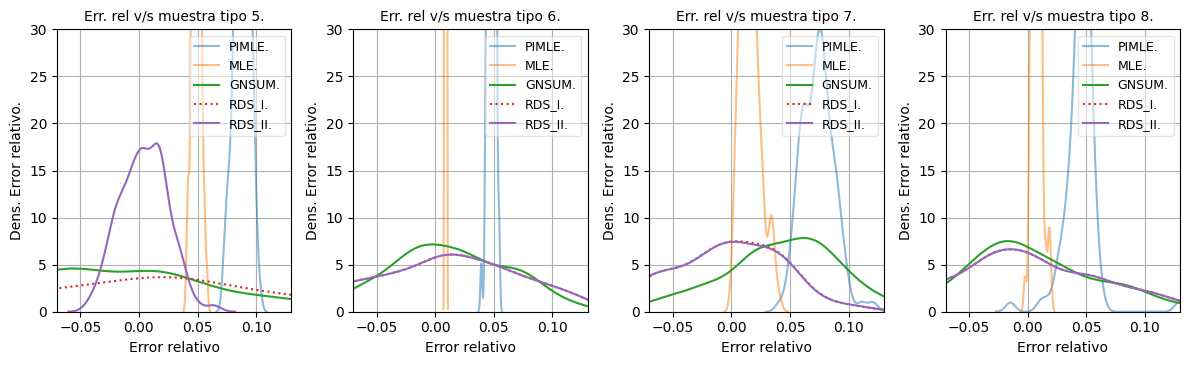

In [202]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.03
l_ylim=[0,30]
l_xlim=[-0.1+delta,0.1+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=2
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

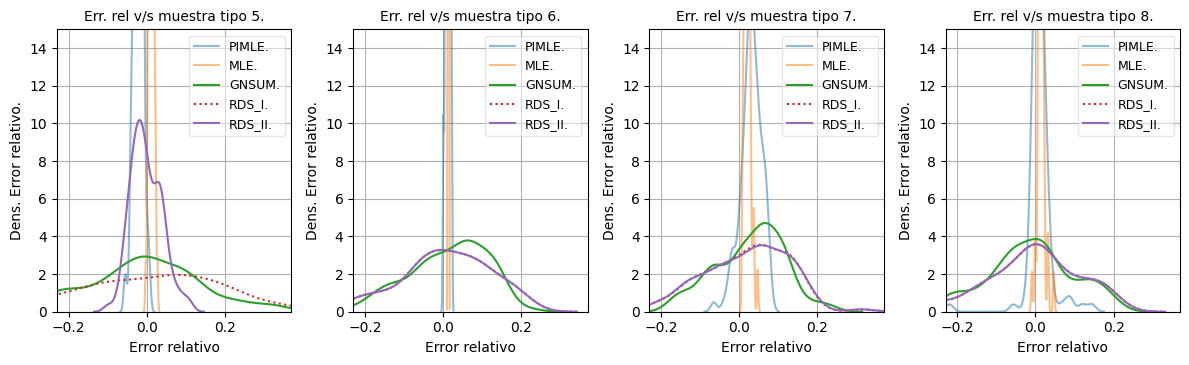

In [203]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.07
l_ylim=[0,15]
l_xlim=[-0.3+delta,0.3+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=3
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

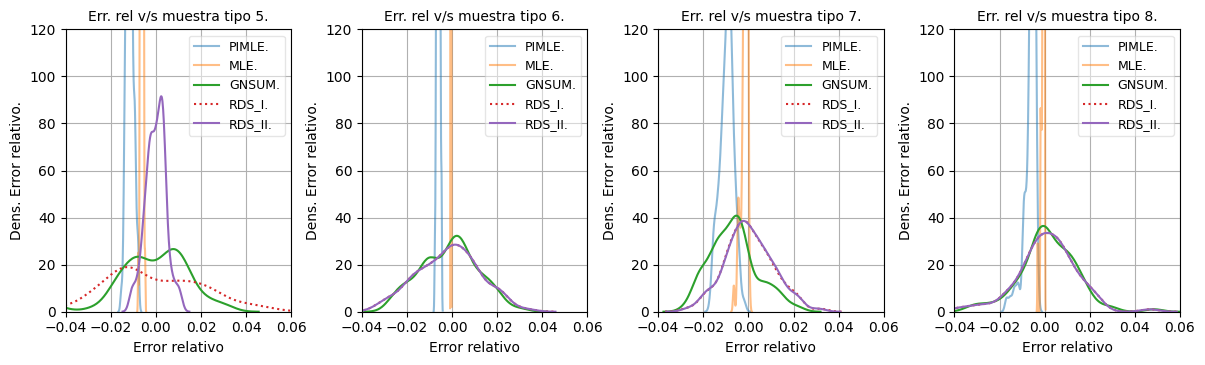

In [204]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.06
l_ylim=[0,120]
l_xlim=[-0.1+delta,0+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=4
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

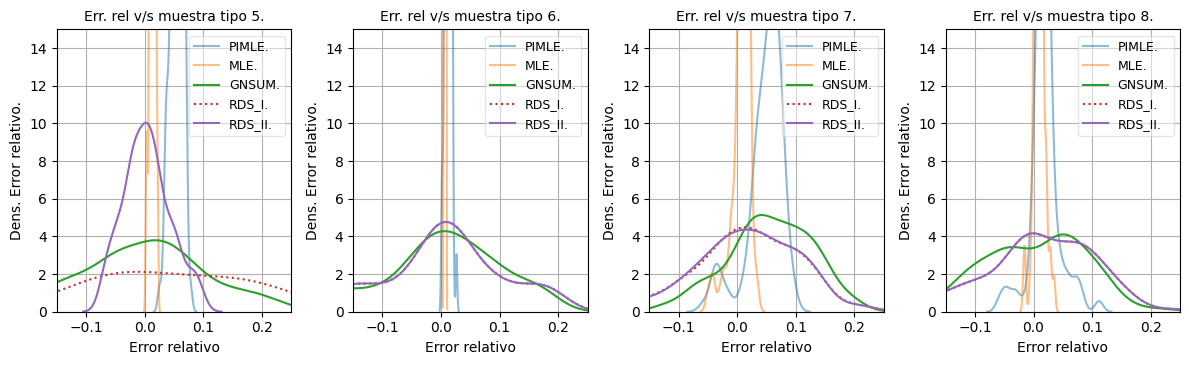

In [205]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.05
l_ylim=[0,15]
l_xlim=[-0.2+delta,0.2+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=5
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

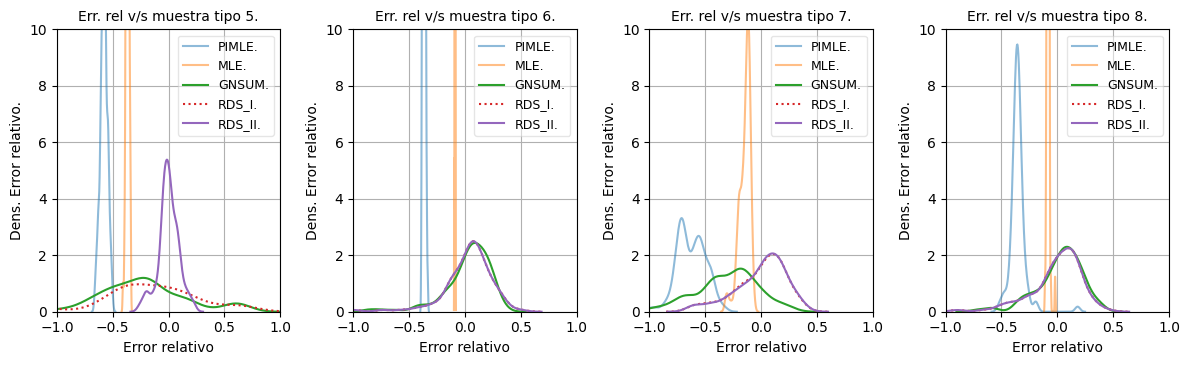

In [206]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[0,10]
l_xlim=[-1,1]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=6
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

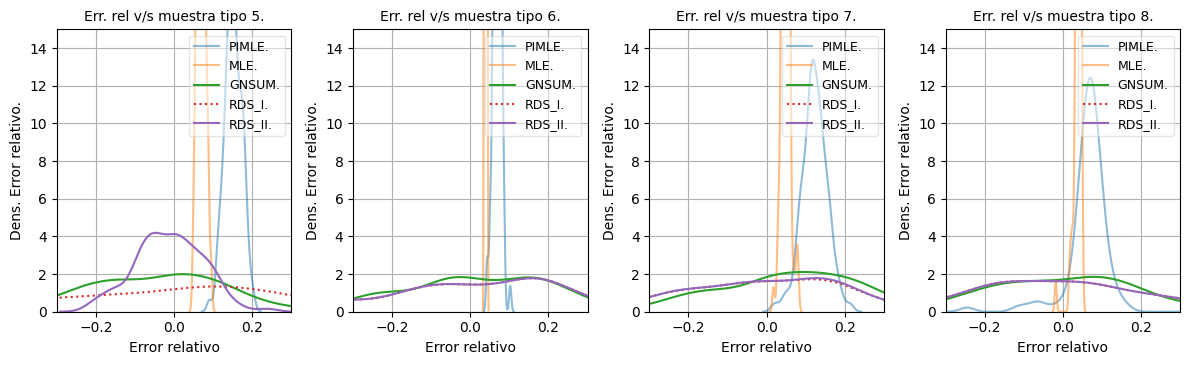

In [207]:
size_figure=(12,15/4) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

l_ylim=[0,15]
l_xlim=[-0.3,0.3]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=7
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

In [9]:
def graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend):
    L_prop_sample=[0.01,0.1,0.5,0.9] 
    l_graficas=L_prop_sample

    cant_filas=len(L_met_est)
    dict_num_row_to_est={u:v for u,v in zip(range(cant_filas),L_met_est)}

    cant_colums=len(Tipo_sample_p_gral)
    dict_num_colum_to__type_sample={u:v for u,v in zip(range(cant_colums),Tipo_sample_p_gral)}

    cant_graficas=len(L_prop_sample)
    dict_num_grafica_to_size_sample={u:v for u,v in zip(range(cant_graficas),L_prop_sample)}

    fig, axes = plt.subplots(cant_filas,cant_colums, figsize=size_figure, sharex=False, sharey=False)    
    
    
    for num_row in range(cant_filas):     # Tipo_sample_p_gral
        metodo_est=dict_num_row_to_est[num_row]    # num_row
        cond_2=df_grupo["Num_metodo_est"]==metodo_est   # num_row ok
        df_row=df_grupo[cond_2]
        
        for num_col in range(cant_colums):     # L_met_est
            met_sample=dict_num_colum_to__type_sample[num_col]
            cond_1=df_row["Tipo_sample_p_gral"]==met_sample  # num_col ok
            df_col=df_row[cond_1]
            #print(num_row,num_col)
                       
            for grafica_i in range(cant_graficas): # L_prop_sample

                size_sample=dict_num_grafica_to_size_sample[grafica_i]            
                cond_3=df_col["Porc_nodos_muestra"]==size_sample  # grafica_i
                df_datos=df_col[cond_3]
                #df_aux=df_experimentacion[cond_1 & cond_2 & cond_3 & cond_contexto] 
                
                datos_i=list(df_datos["Valor_error_rel(Exac - Est)"])
                #print("cantidad de datos",len(datos_i))
                label_name=str(round(size_sample*100,1))+"%."
                #sns.kdeplot(datos_i,bw=0.3, label=label_name, lw=1.5,ax=axes[num_row,num_col])                    
                sns.kdeplot(datos_i,bw=1, label=label_name, lw=1.5,ax=axes[num_row,num_col])                                    
                
                ylim=dict_met_to_ylim[metodo_est]
                axes[num_row,num_col].set_ylim(ylim)
                
                xlim=dict_met_to_xlim[metodo_est]
                axes[num_row,num_col].set_xlim(xlim)            
                axes[num_row,num_col].grid(True)
                if act_legend:
                    axes[num_row,num_col].legend(loc='upper right',fontsize=10, title ='Prop.de muestreo:')    
                #axes[num_row,num_col].legend(loc='lower right',prop={'size': 10}, title ='Mét. estimadores:')
                
            xlabel="Error relativo"
            axes[num_row,num_col].set_xlabel(xlabel,fontsize=10) 
            ylabel="Dens. Err. rel("+str(metodo_est)+")."
            axes[num_row,num_col].set_ylabel(ylabel,fontsize=10)      
            titulo="Err. rel v/s muestra tipo "+str(met_sample)+"."
            axes[num_row,num_col].set_title(titulo,fontsize=10) 
    plt.tight_layout()                            

# Estimaciones para el grupo 0

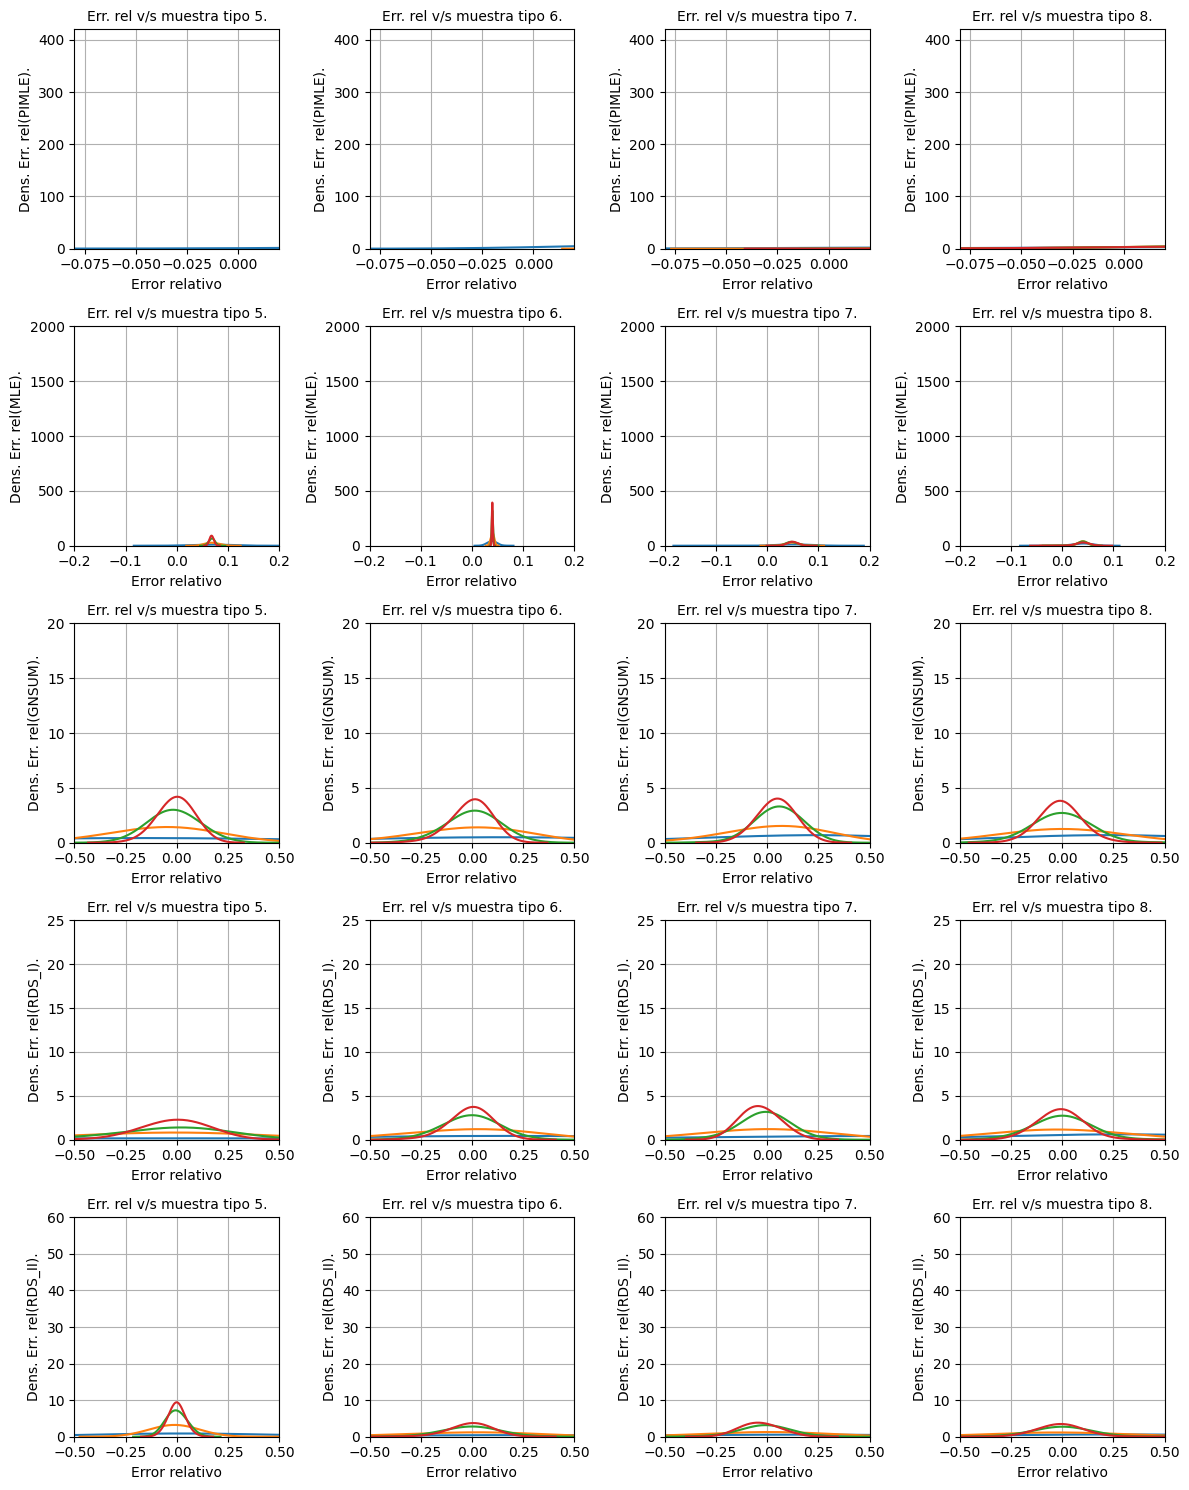

In [10]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,420],[0,2000],[0,20],[0,25],[0,60]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=7

grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]

l_xlim=[[-0.080, 0.02],[-0.2, 0.2],[-0.5, 0.5],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo, Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

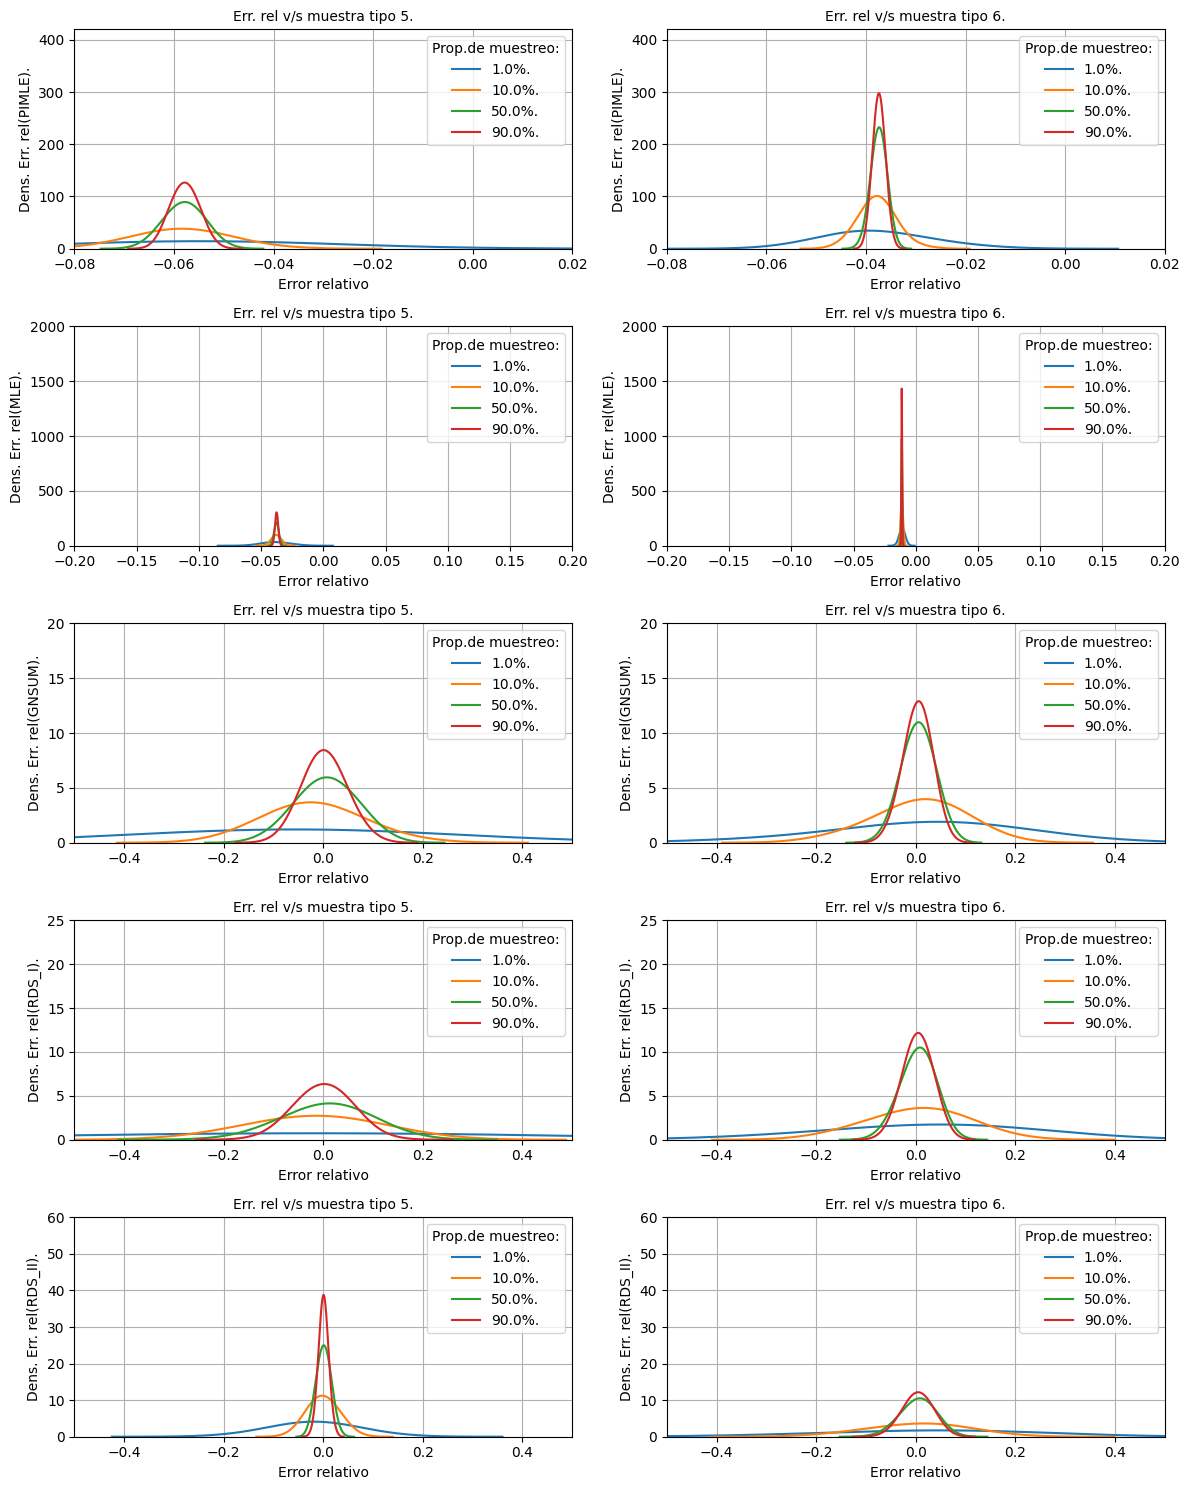

In [11]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,420],[0,2000],[0,20],[0,25],[0,60]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=0
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

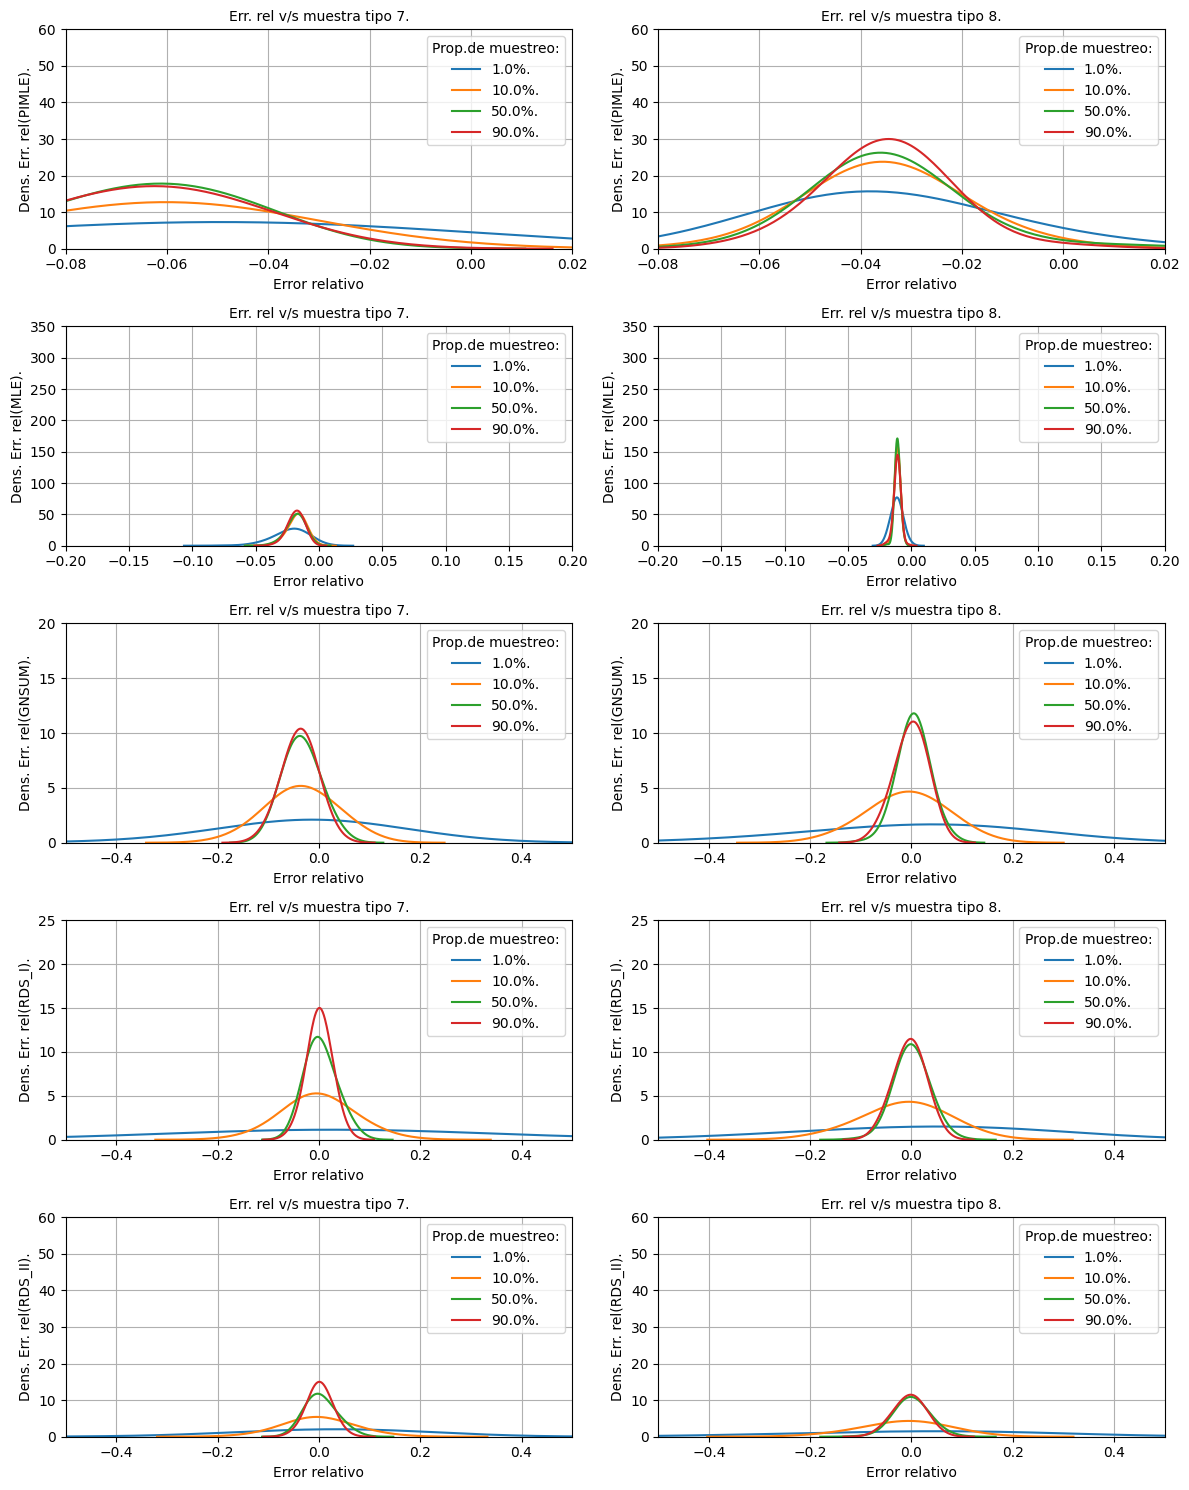

In [12]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,60],[0,350],[0,20],[0,25],[0,60]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=0
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

# Estimaciones de tamaño para el grupo i=1.

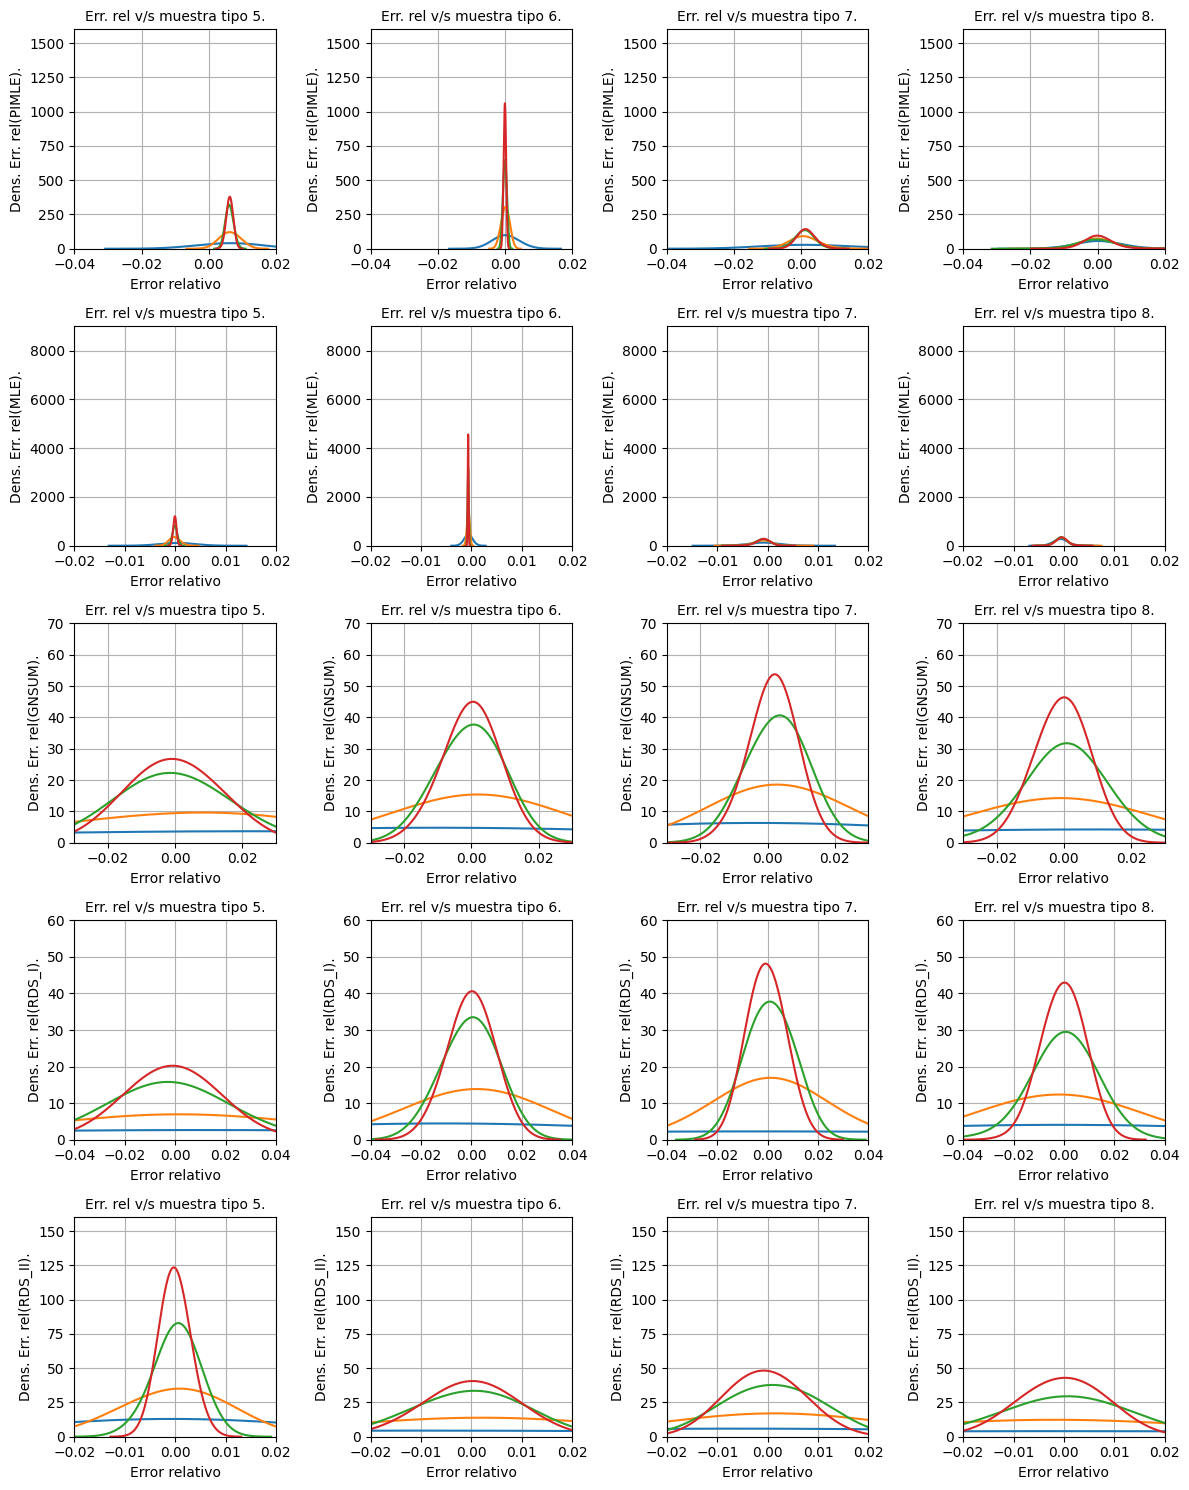

In [13]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,1600],[0,9000],[0,70],[0,60],[0,160]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=1
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
l_xlim=[[-0.04, 0.02],[-0.02, 0.02],[-0.03, 0.03],[-0.04, 0.04],[-0.02, 0.02]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

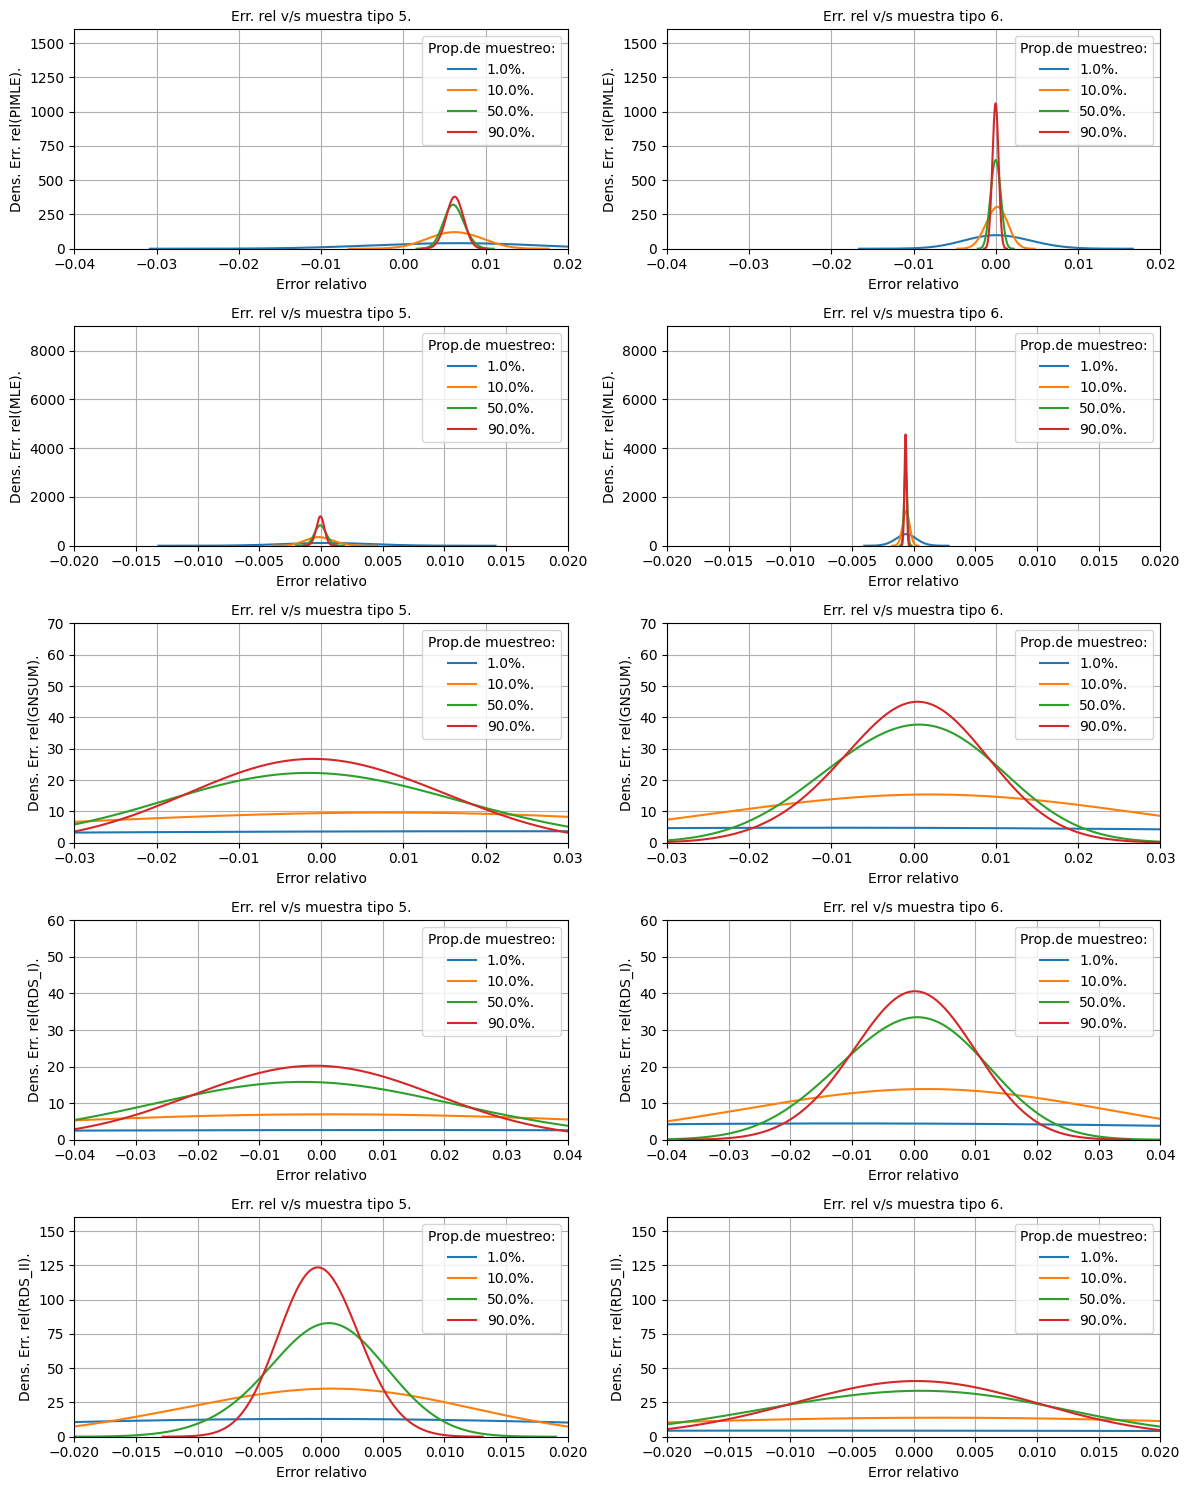

In [14]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,1600],[0,9000],[0,70],[0,60],[0,160]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=1
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

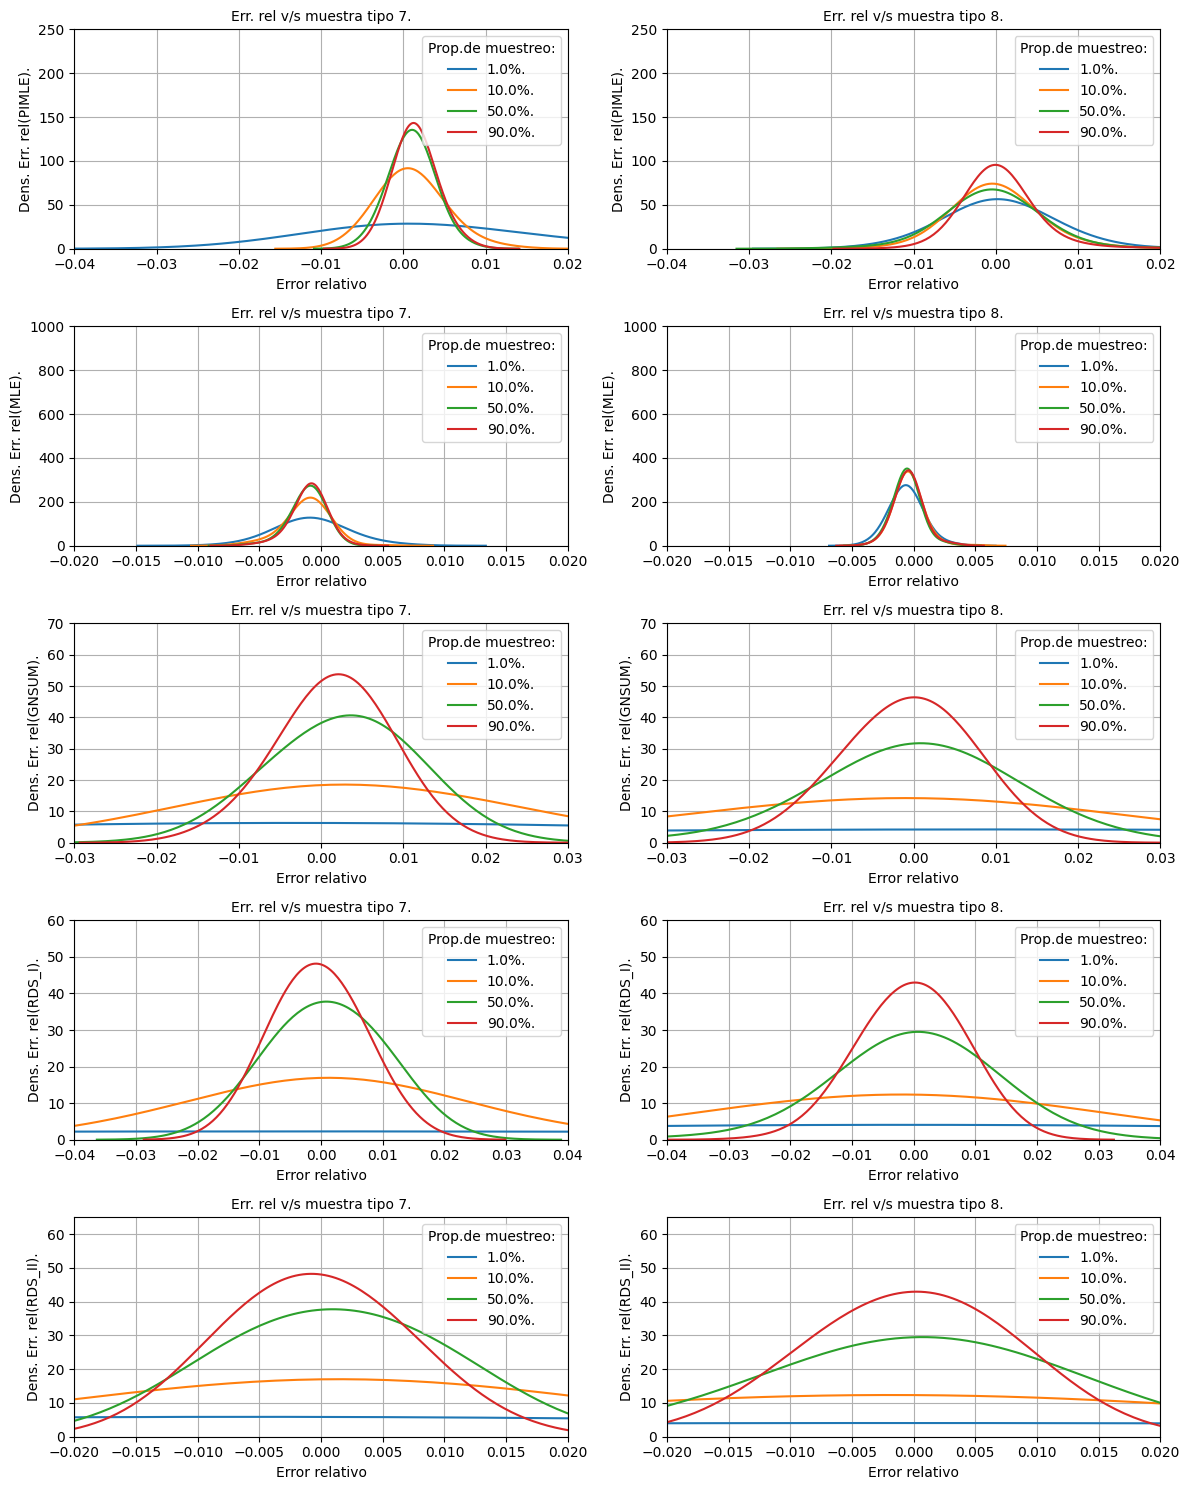

In [15]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,250],[0,1000],[0,70],[0,60],[0,65]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=1
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

# Estimaciones de tamaño para el grupo i=2.

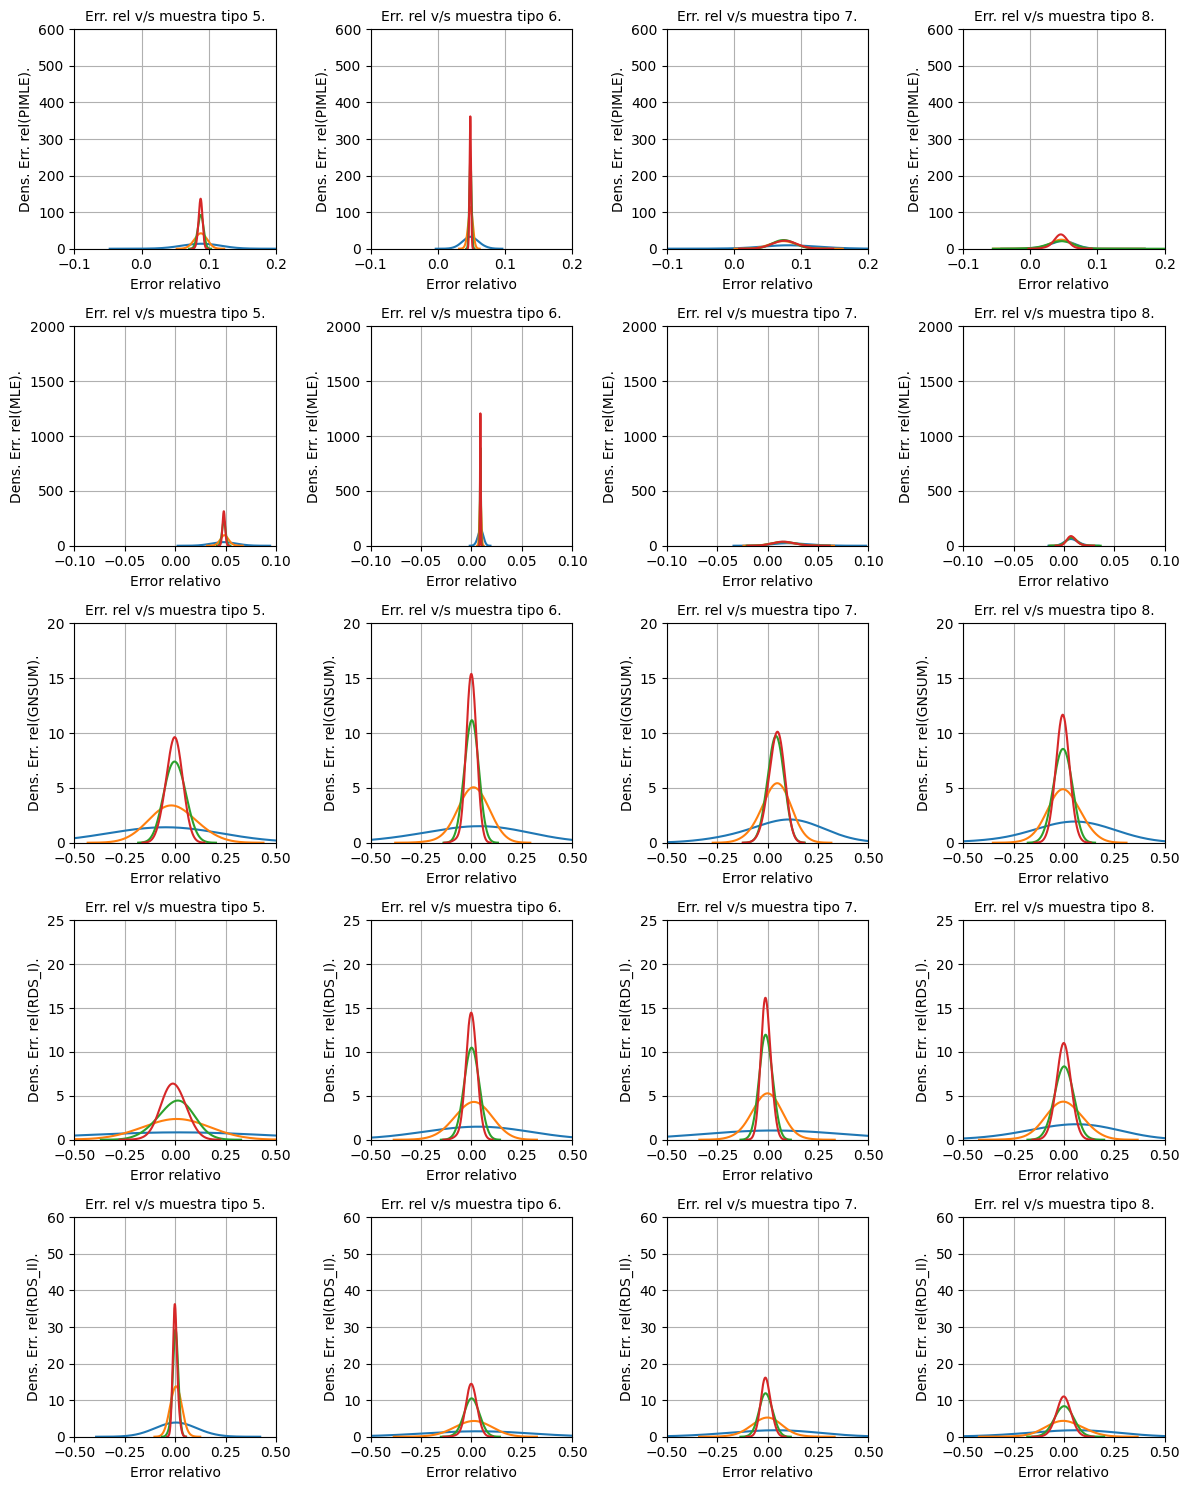

In [16]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,600],[0,2000],[0,20],[0,25],[0,60]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=2
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
l_xlim=[[-0.1, 0.2],[-0.1, 0.1],[-0.5, 0.5],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

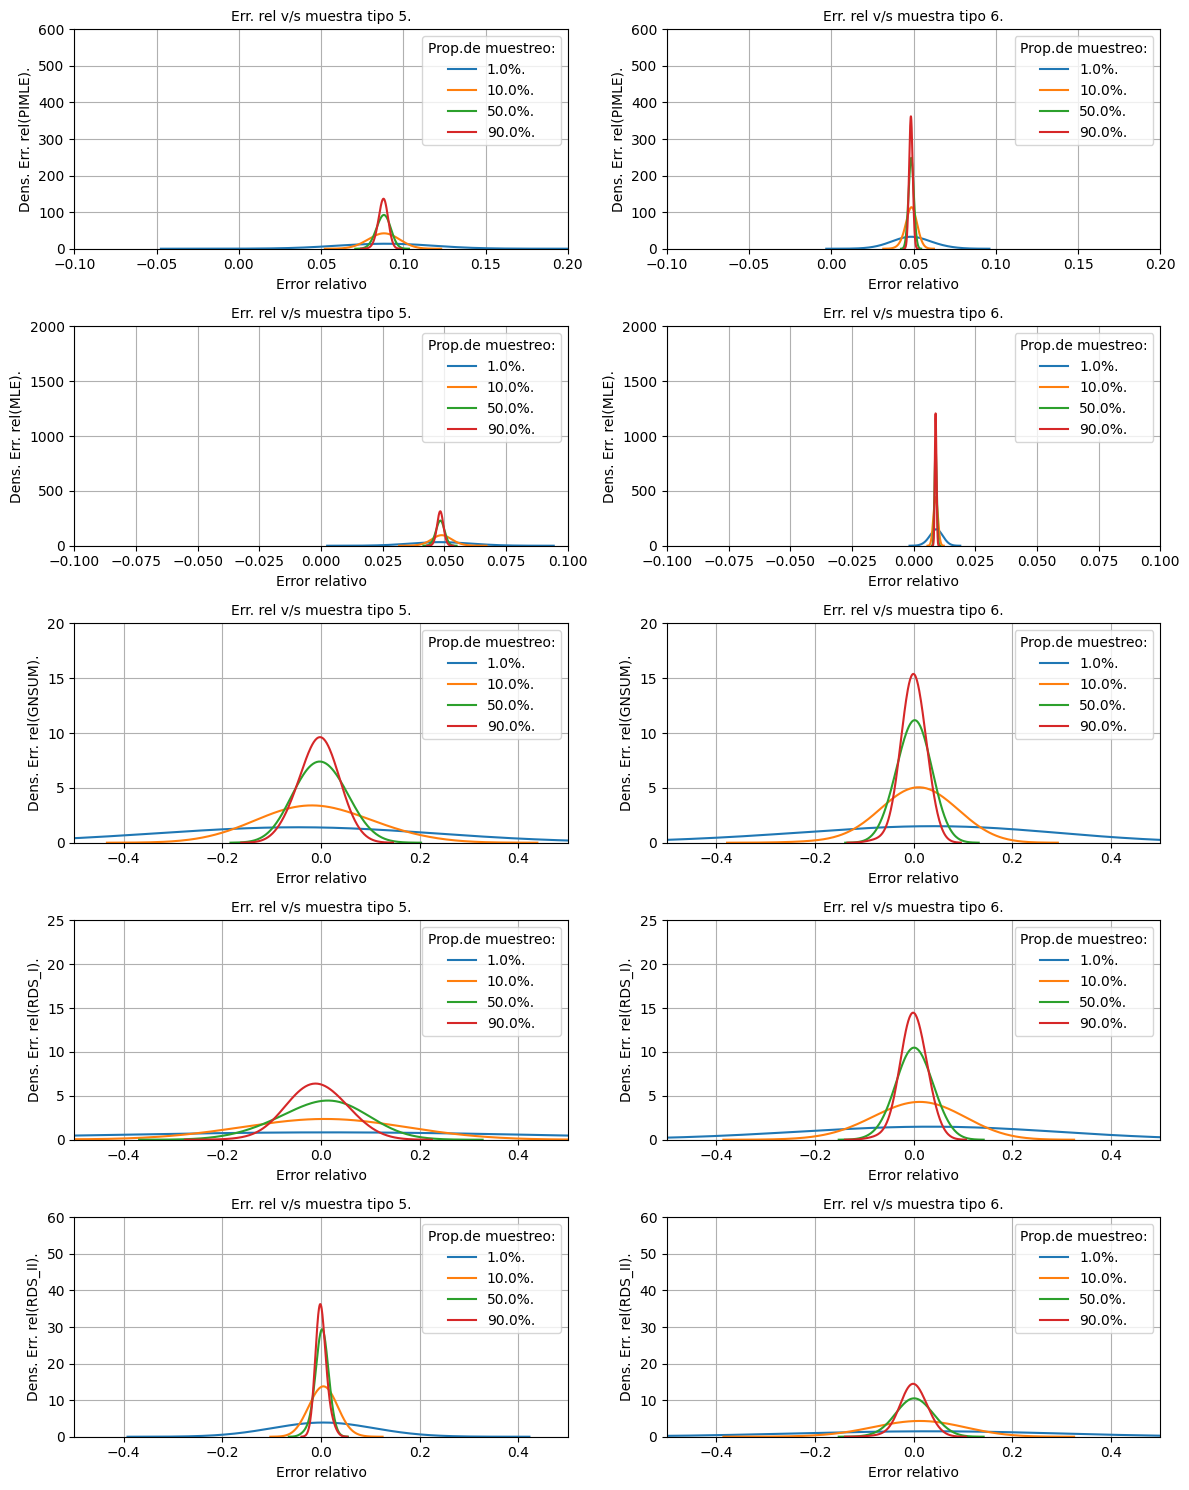

In [17]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,600],[0,2000],[0,20],[0,25],[0,60]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=2
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

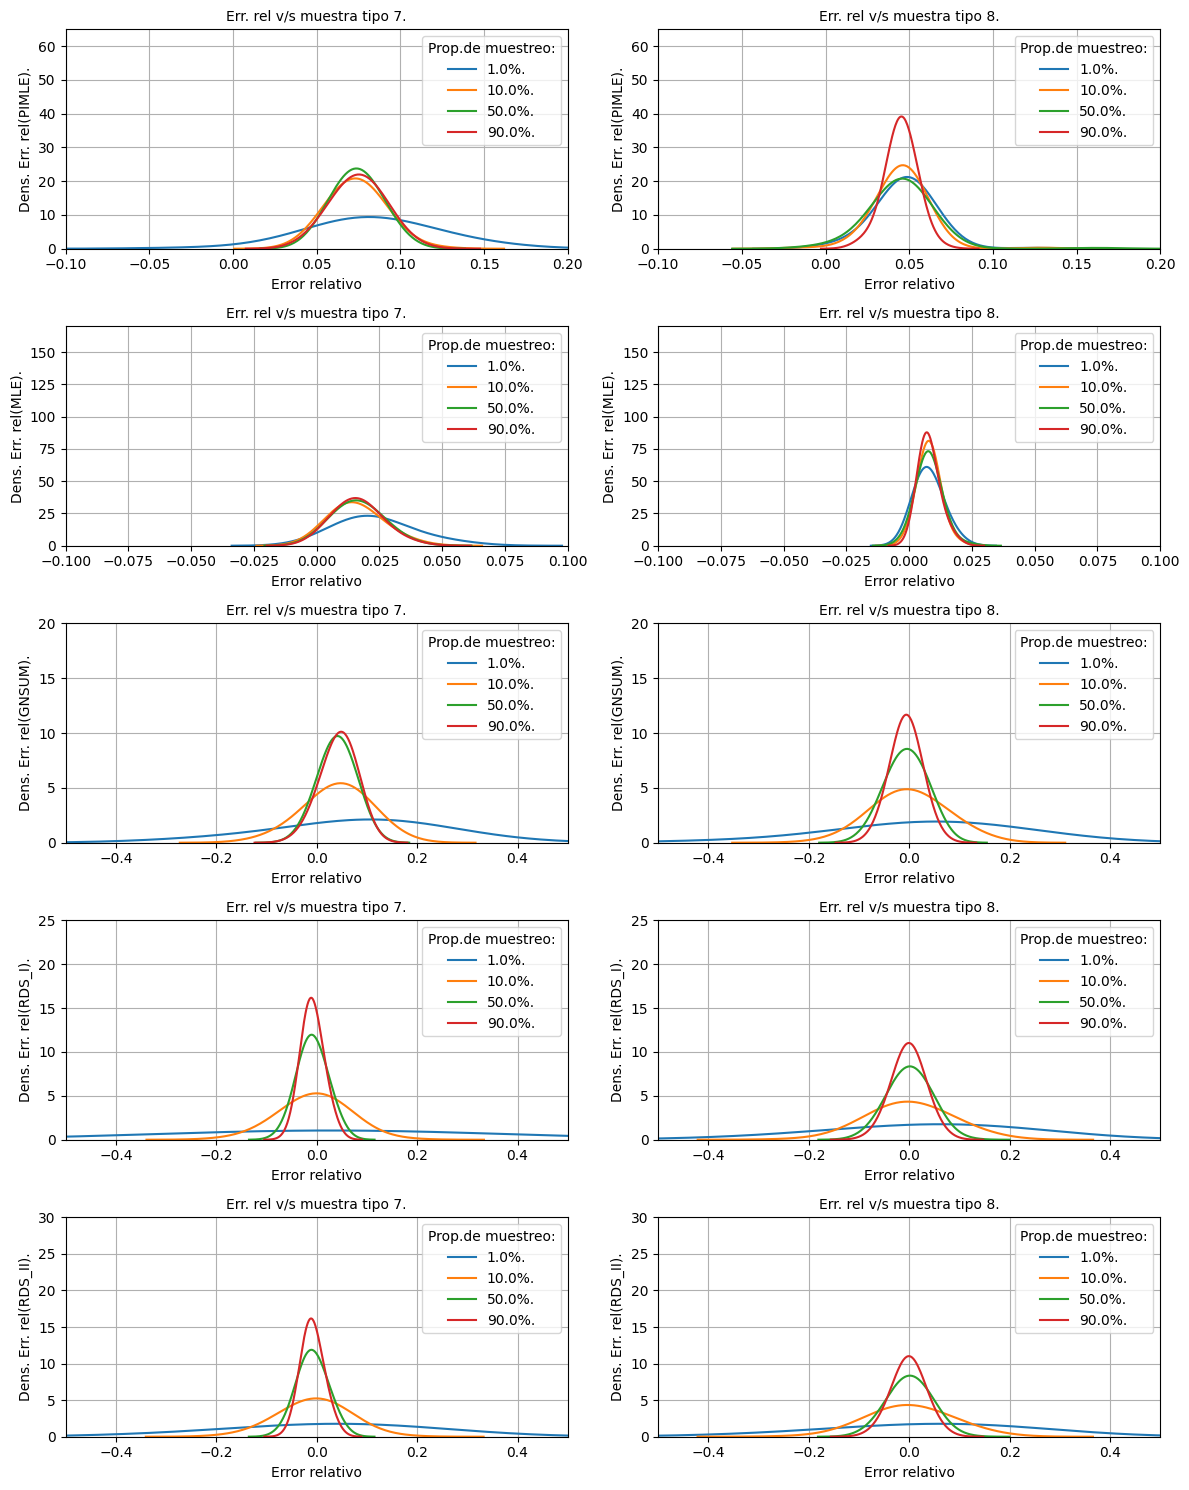

In [18]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,65],[0,170],[0,20],[0,25],[0,30]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=2
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

# Estimaciones de tamaño para el grupo i=3.

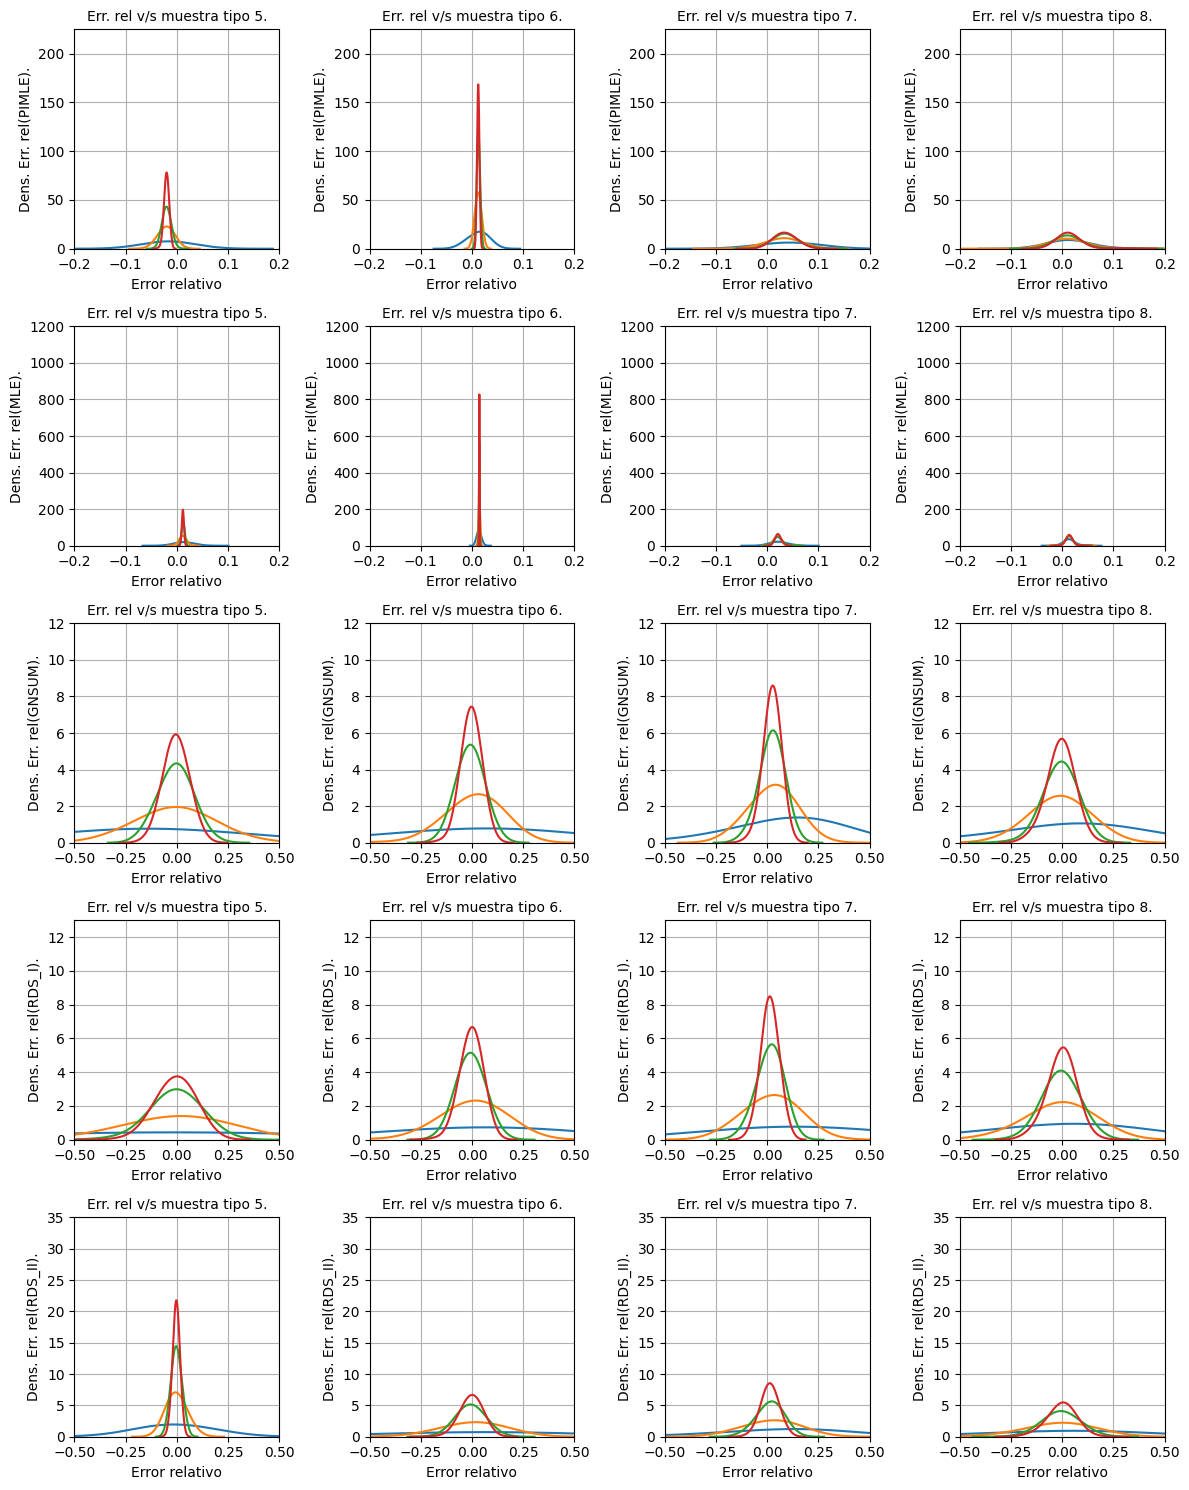

In [19]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,225],[0,1200],[0,12],[0,13],[0,35]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=3
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]

l_xlim=[[-0.2, 0.2],[-0.2, 0.2],[-0.5, 0.5],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

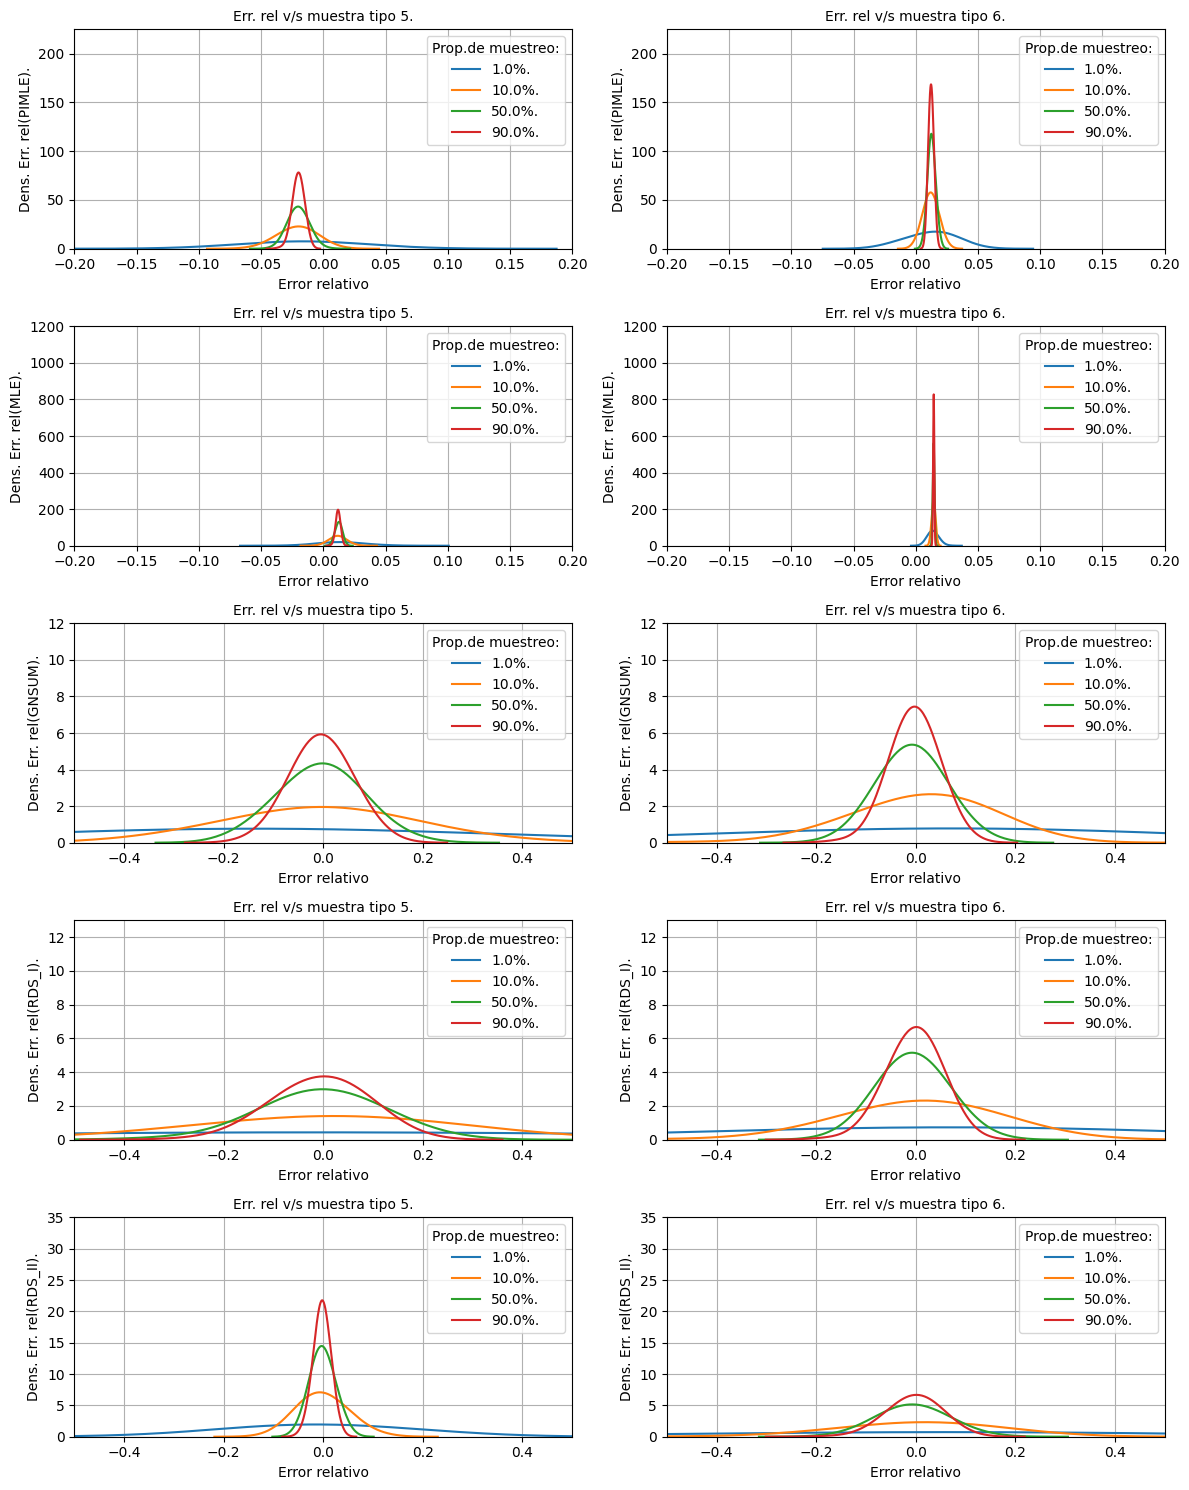

In [20]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,225],[0,1200],[0,12],[0,13],[0,35]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=3
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

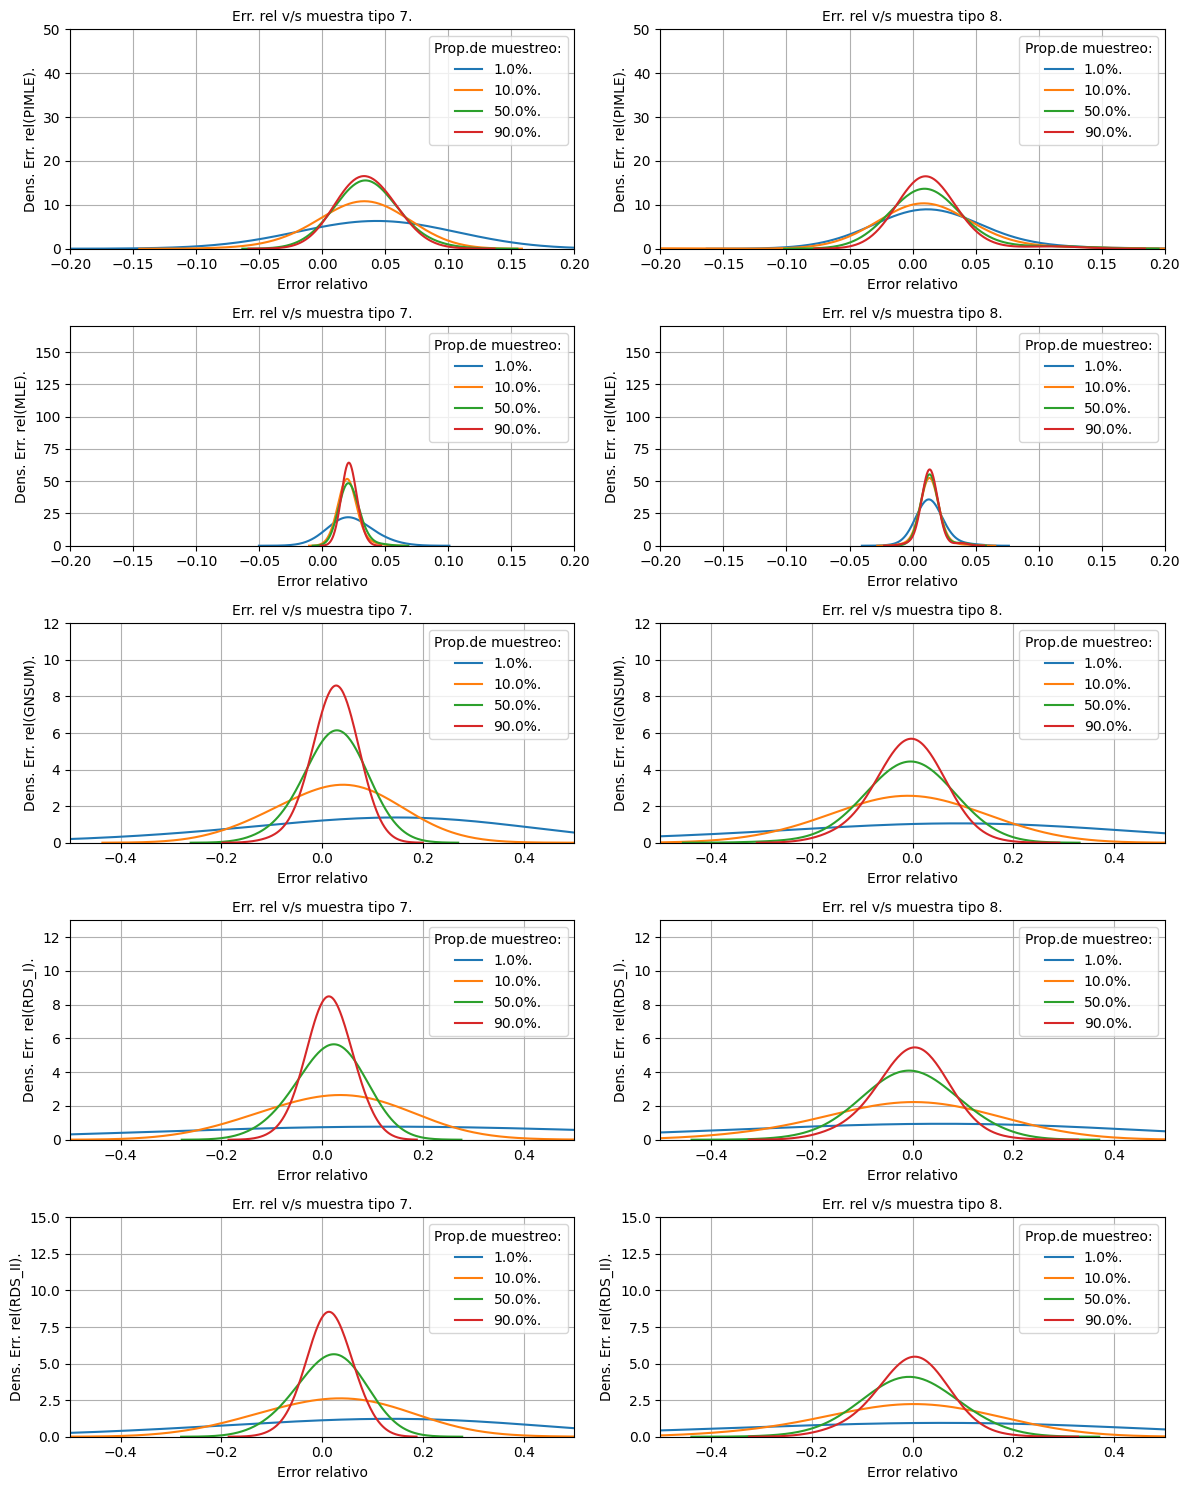

In [21]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,50],[0,170],[0,12],[0,13],[0,15]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=3
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

# Estimaciones de tamaño para el grupo i=4.

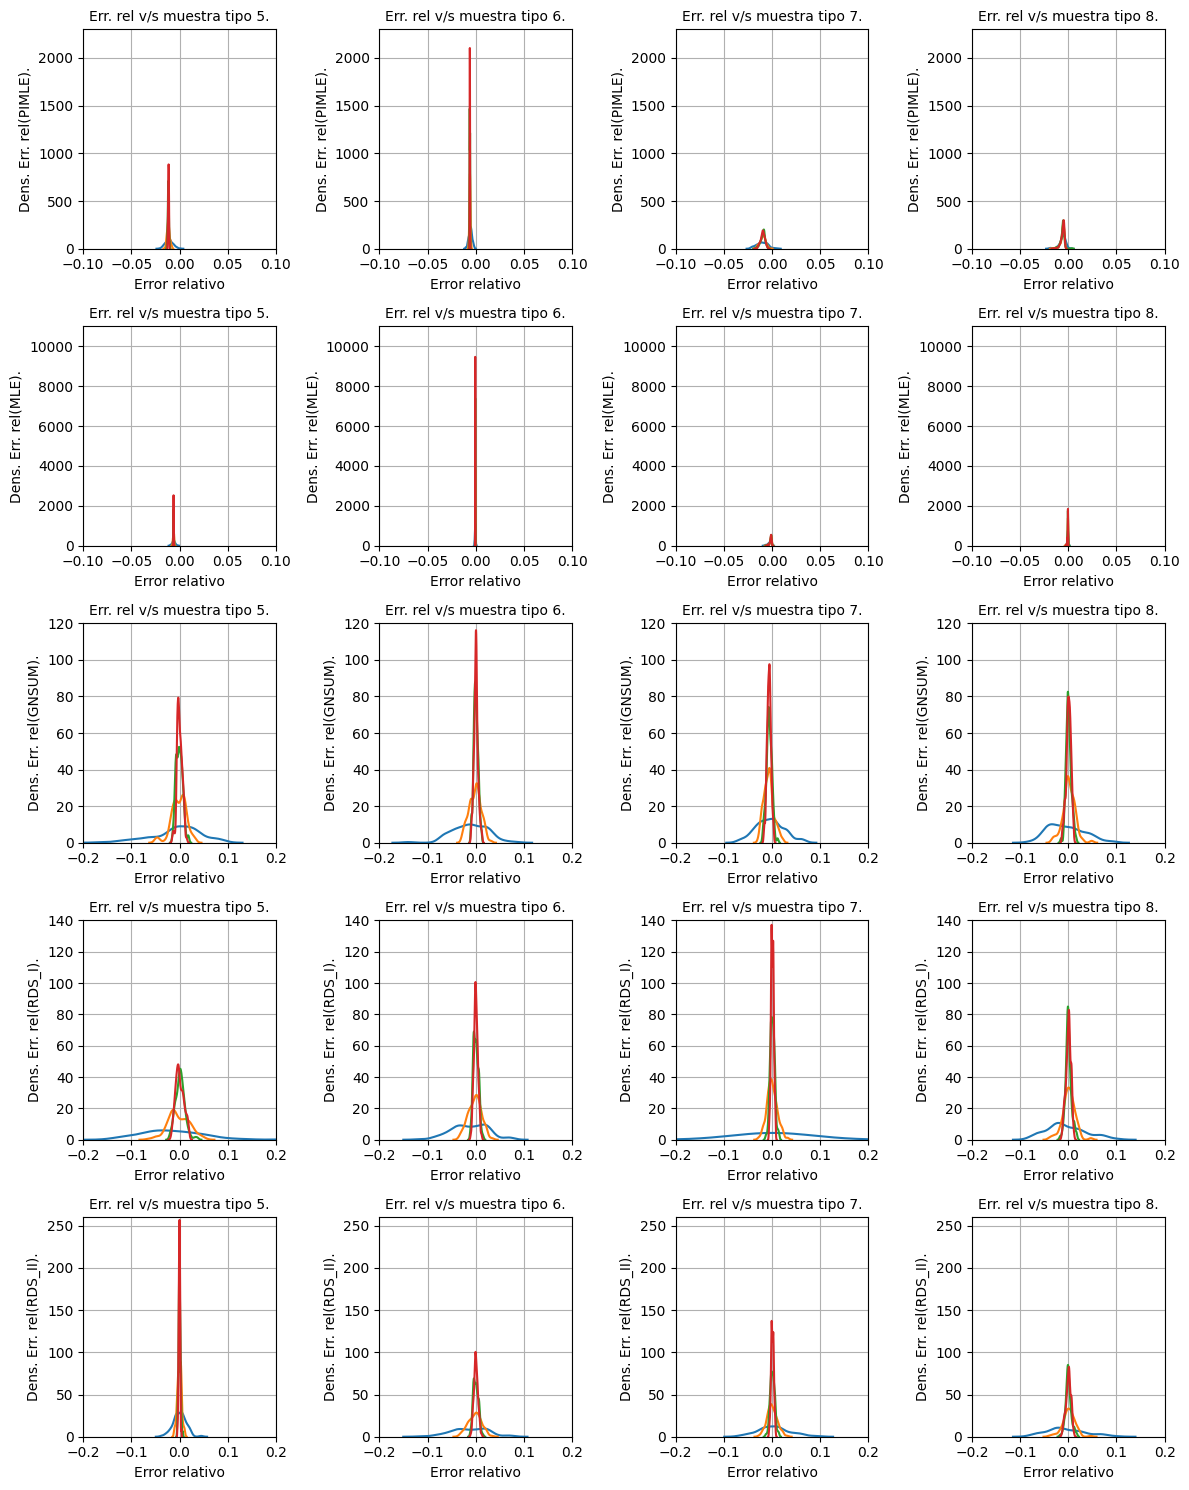

In [75]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,2300],[0,11000],[0,120],[0,140],[0,260]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=4
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]

l_xlim=[[-0.1, 0.1],[-0.1, 0.1],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

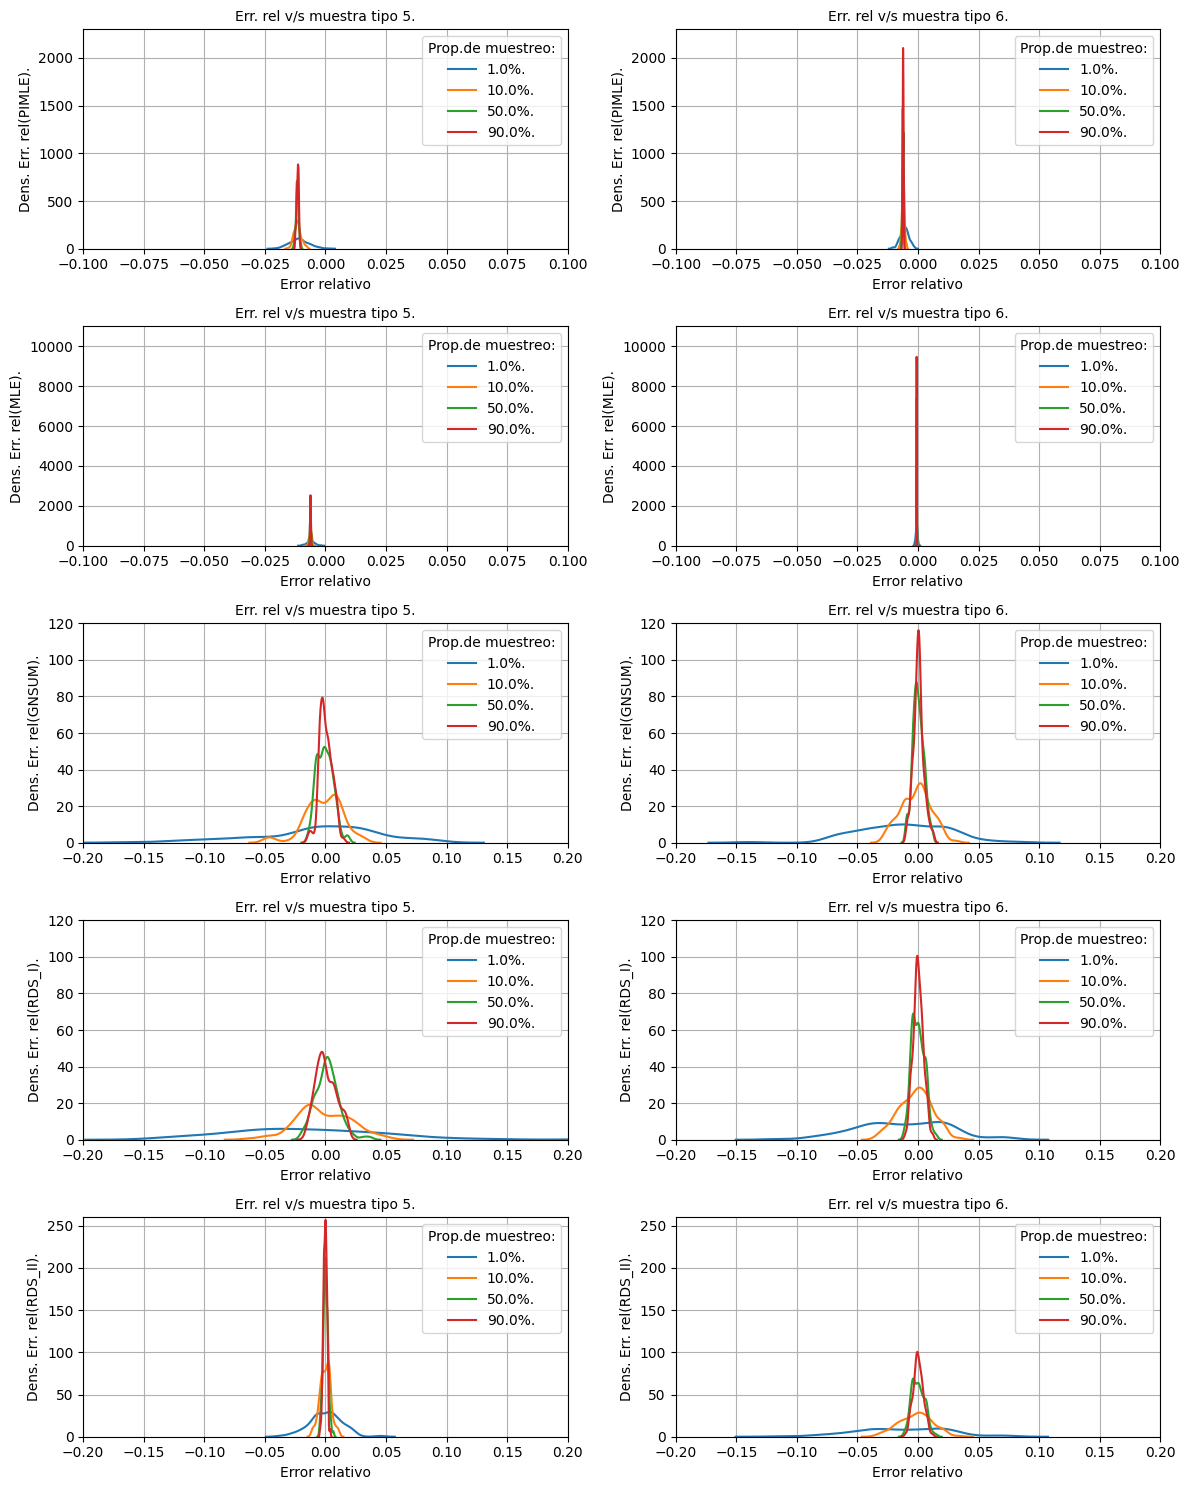

In [76]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,2300],[0,11000],[0,120],[0,120],[0,260]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=4
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

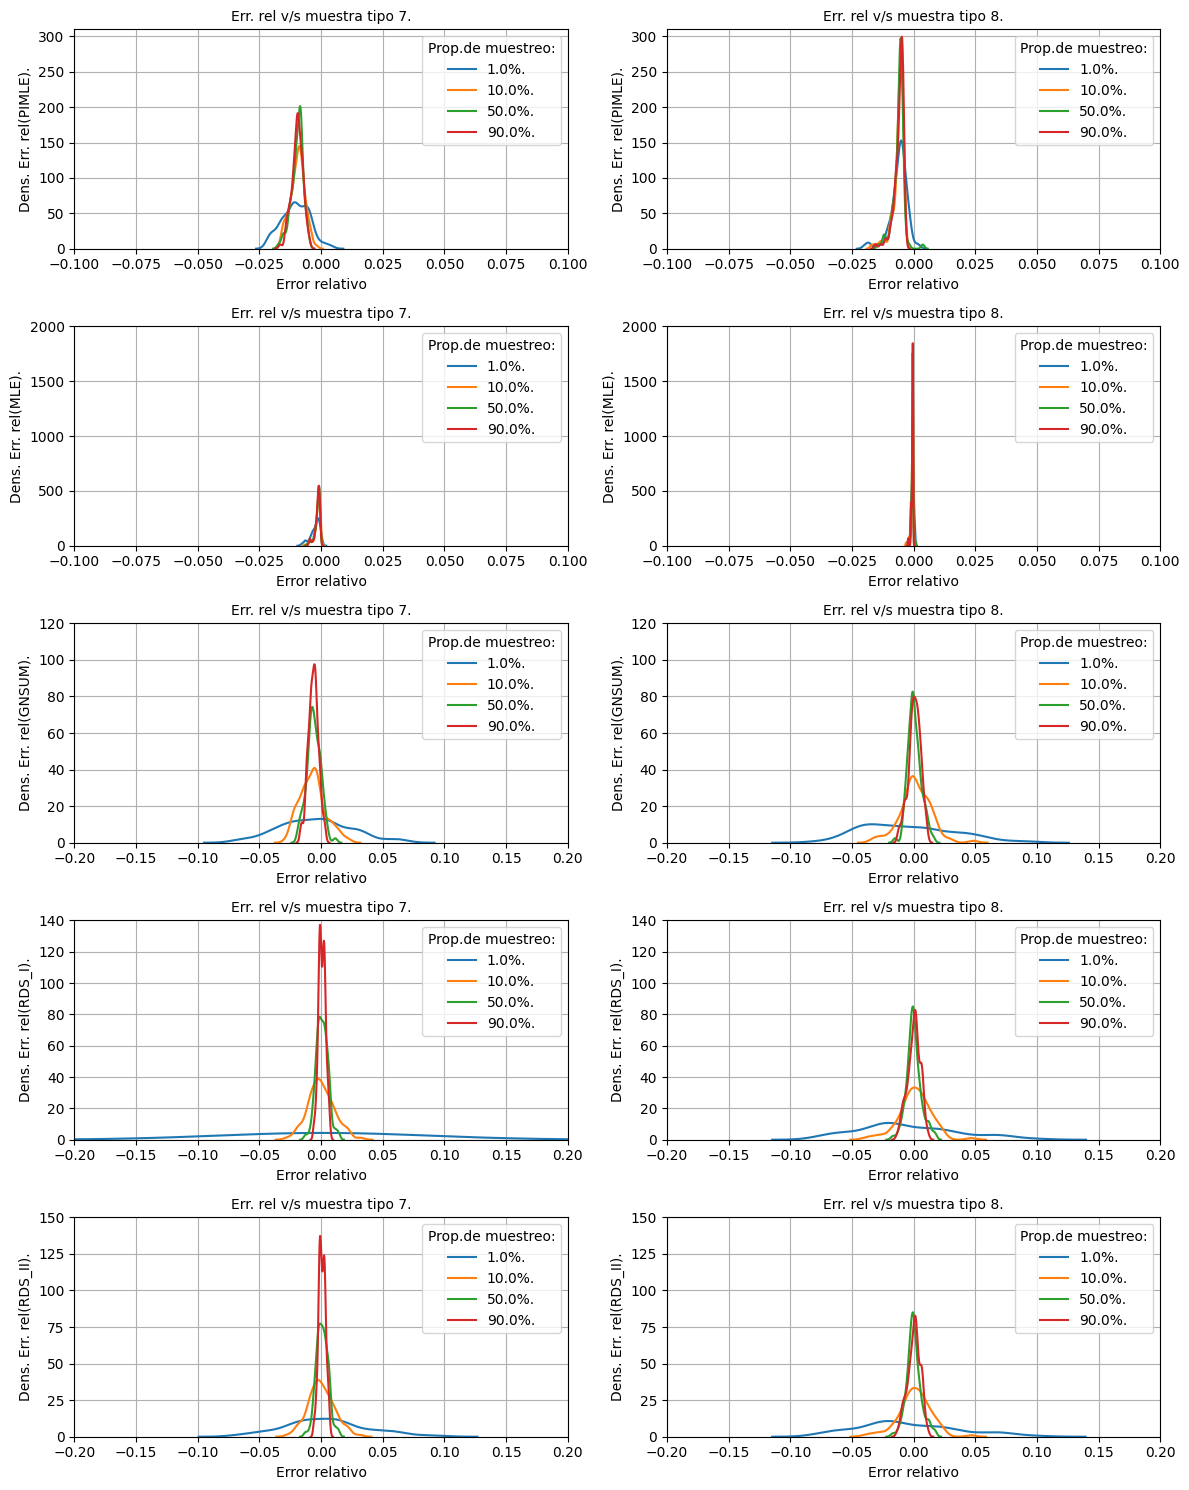

In [77]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,310],[0,2000],[0,120],[0,140],[0,150]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=4
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

# Estimaciones de tamaño para el grupo i=5.

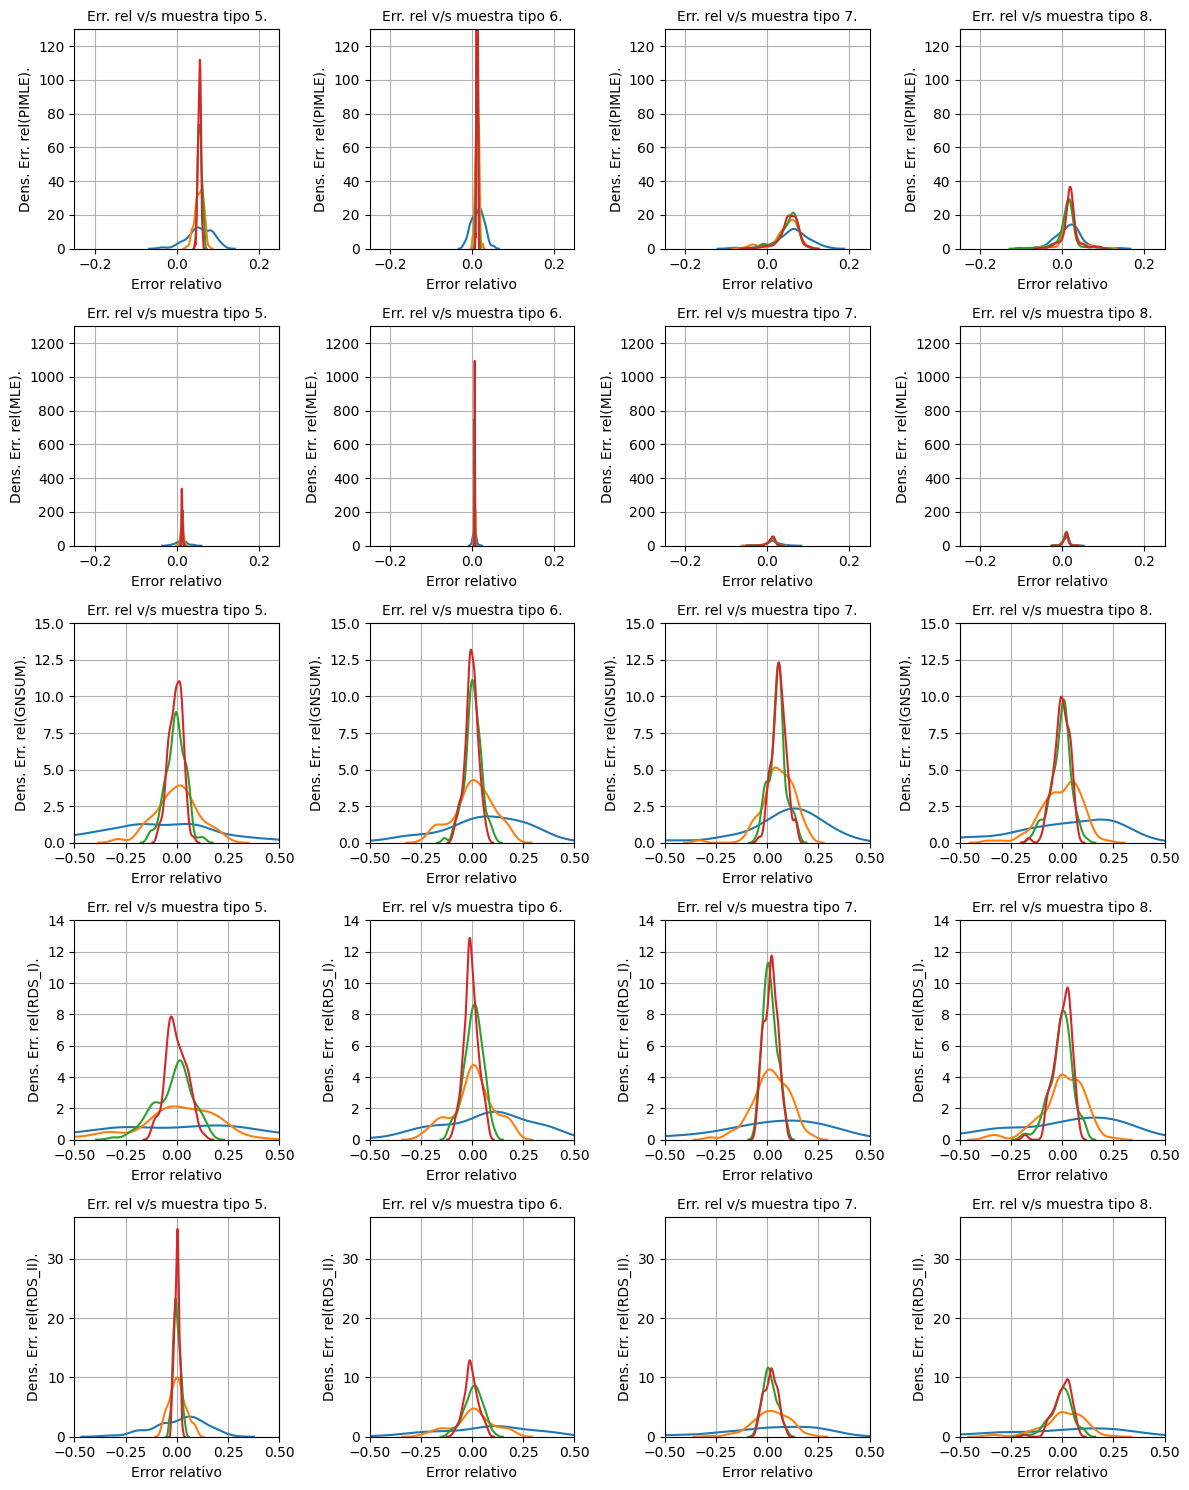

In [78]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,130],[0,1300],[0,15],[0,14],[0,37]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=5
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]


l_xlim=[[-0.25, 0.25],[-0.25, 0.25],[-0.5, 0.5],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

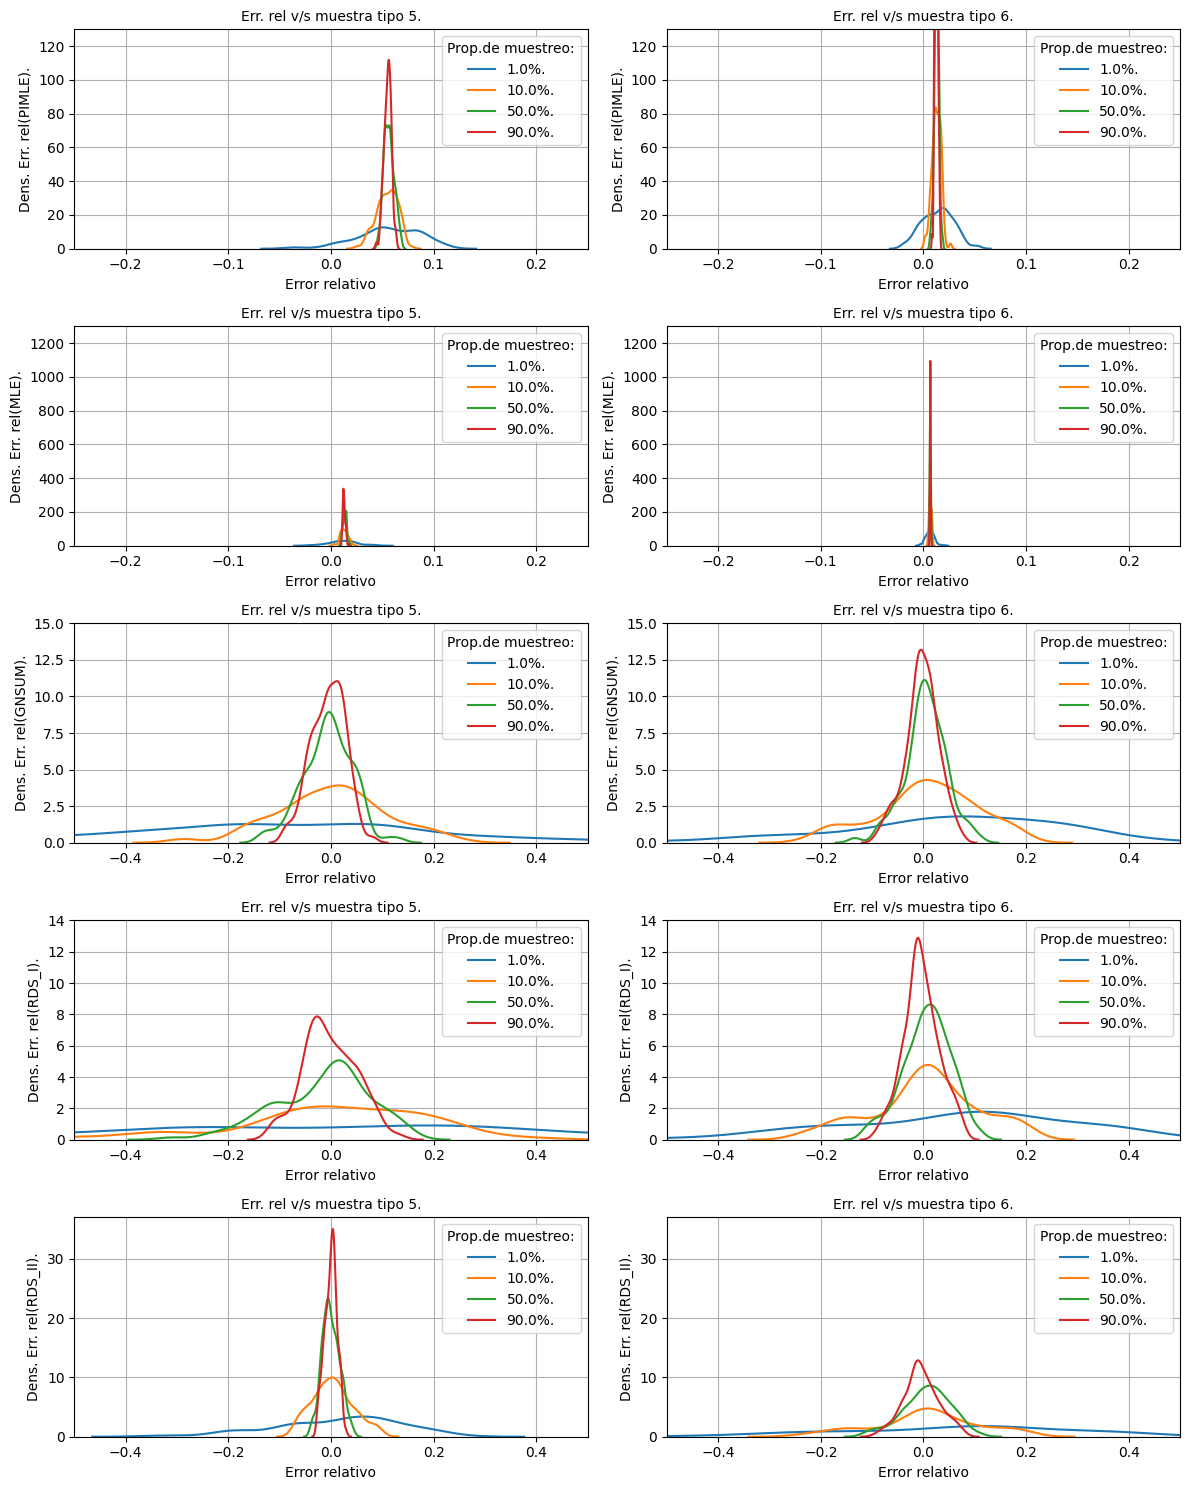

In [79]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,130],[0,1300],[0,15],[0,14],[0,37]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=5
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

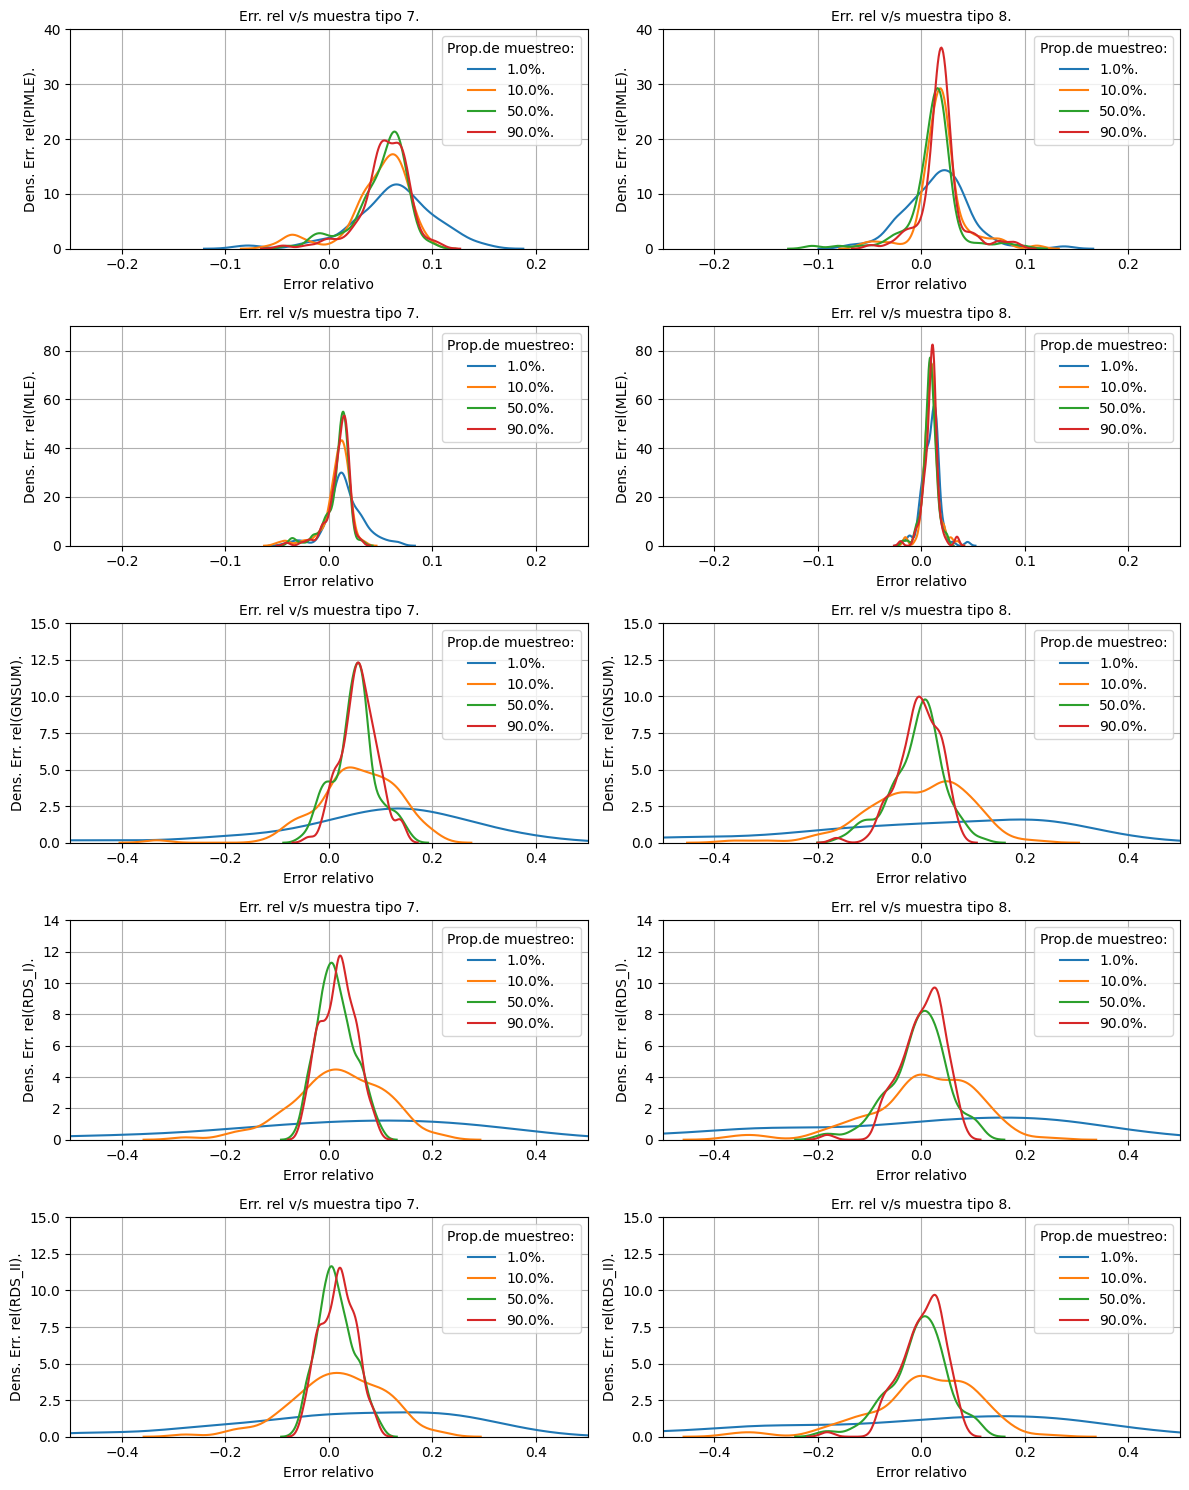

In [80]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,40],[0,90],[0,15],[0,14],[0,15]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=5
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

# Estimaciones de tamaño para el grupo i=6.

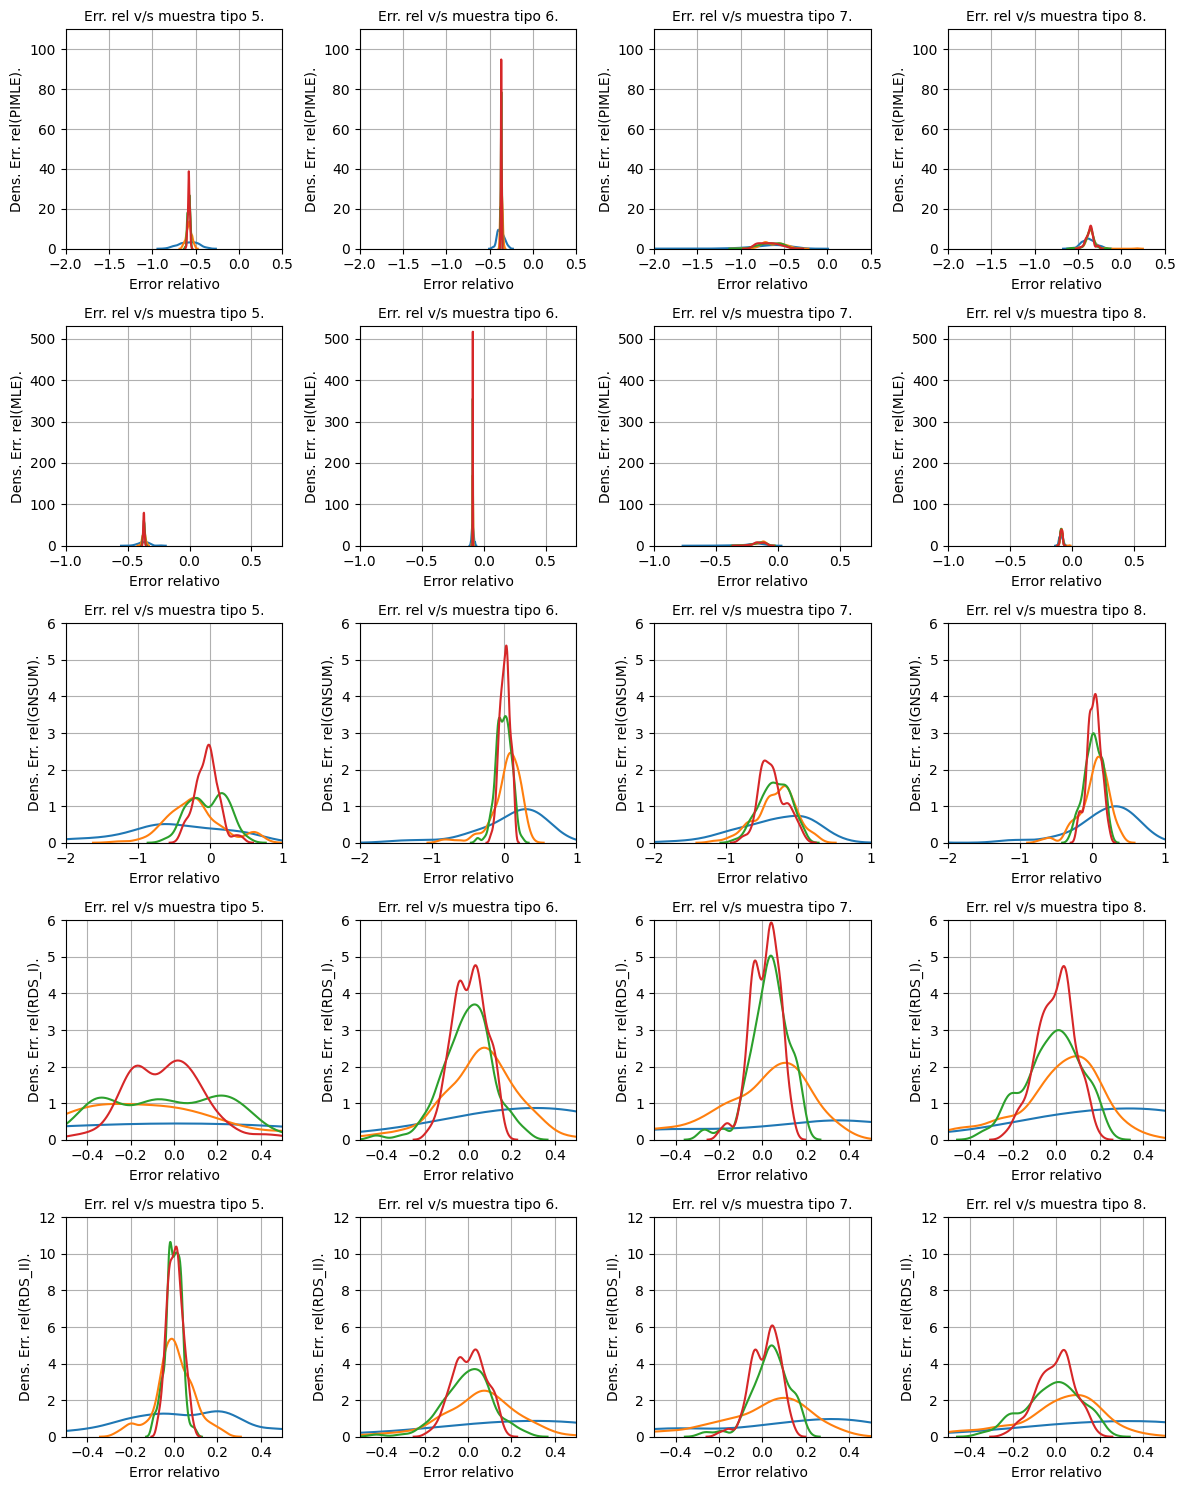

In [81]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,110],[0,530],[0,6],[0,6],[0,12]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=6
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]


l_xlim=[[-2, 0.5],[-1, 0.75],[-2, 1],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

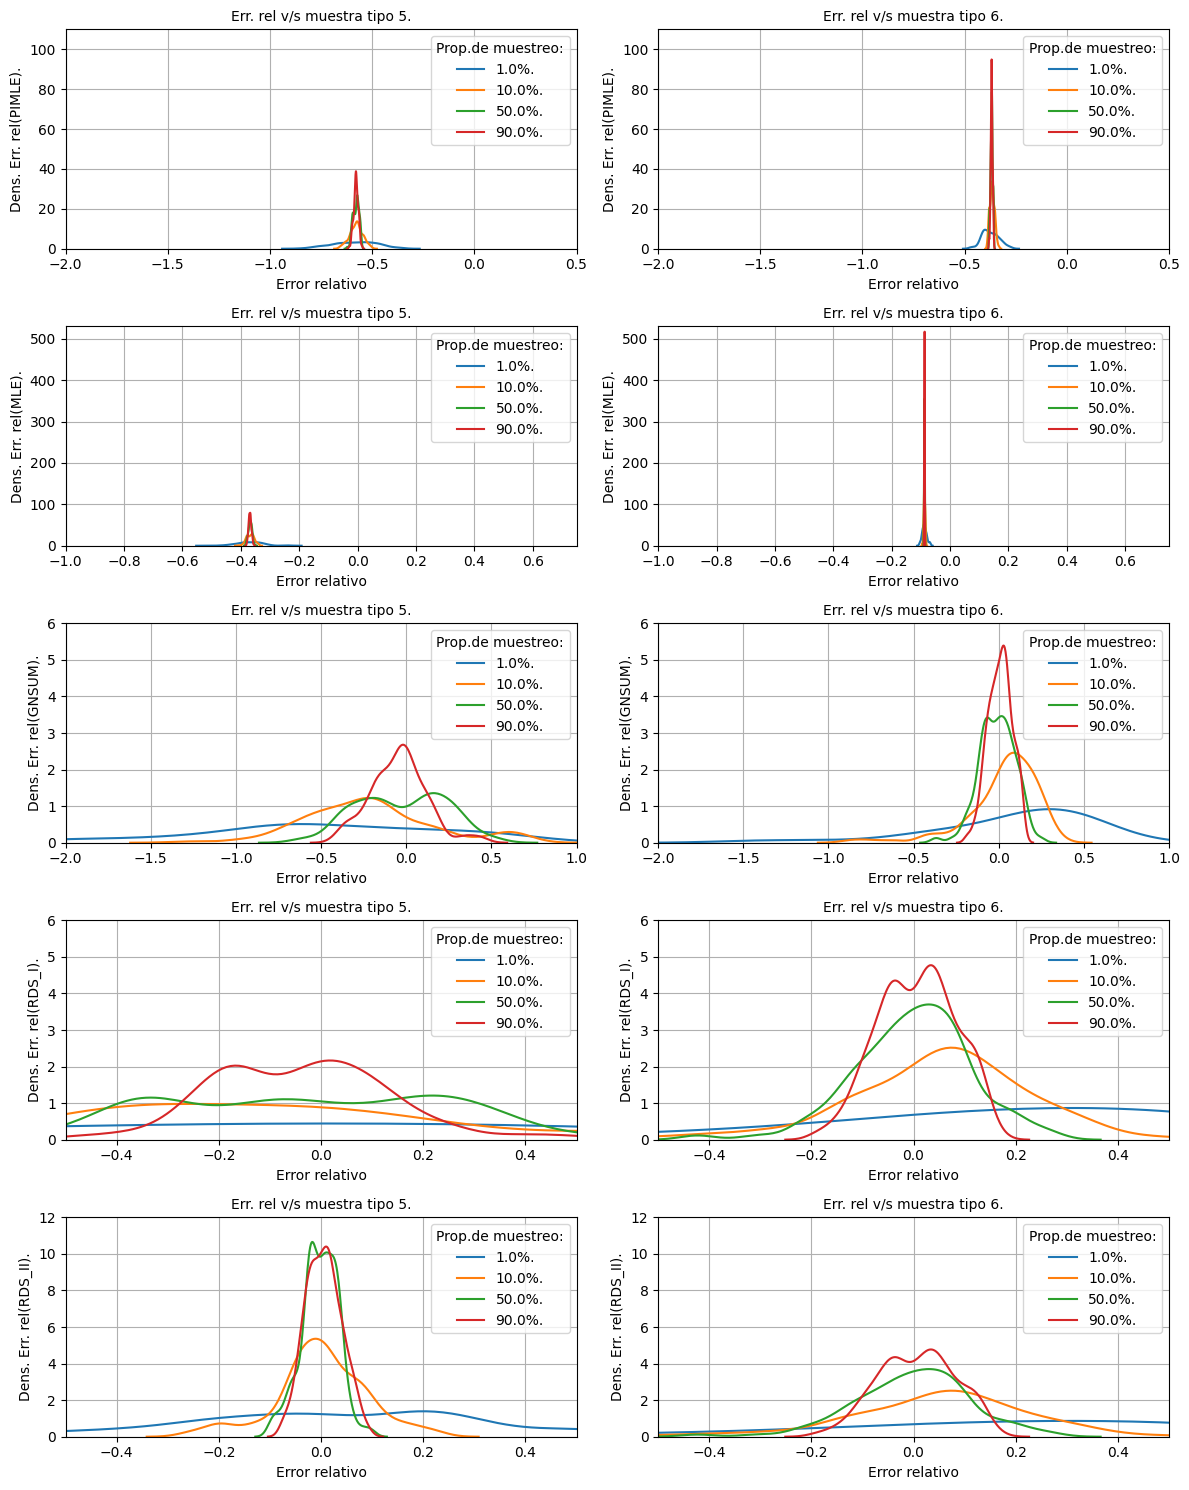

In [82]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,110],[0,530],[0,6],[0,6],[0,12]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=6
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]

#l_xlim=[[-2, 0.5],[-1, 0.5],[-2, 1],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=True
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

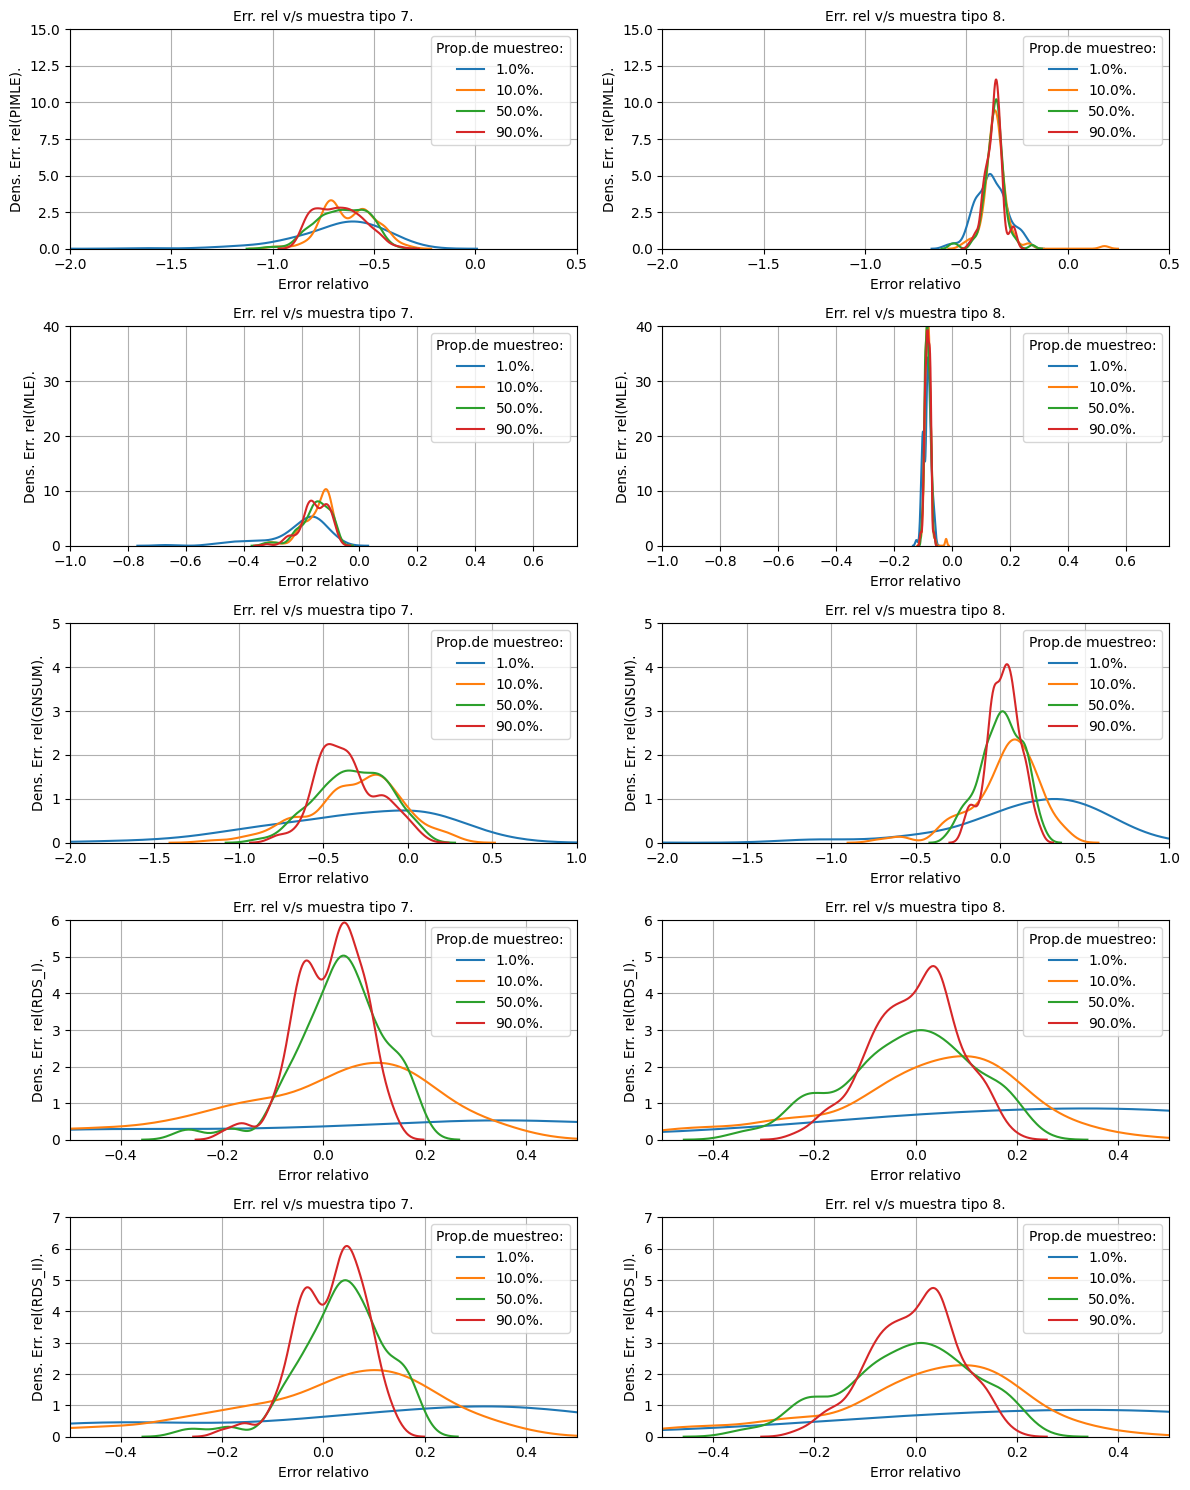

In [83]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,15],[0,40],[0,5],[0,6],[0,7]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}


l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=6
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]

#l_xlim=[[-2, 0.5],[-2, 0.5],[-2, 1],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=True
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

# Estimaciones de tamaño para el grupo i=7.

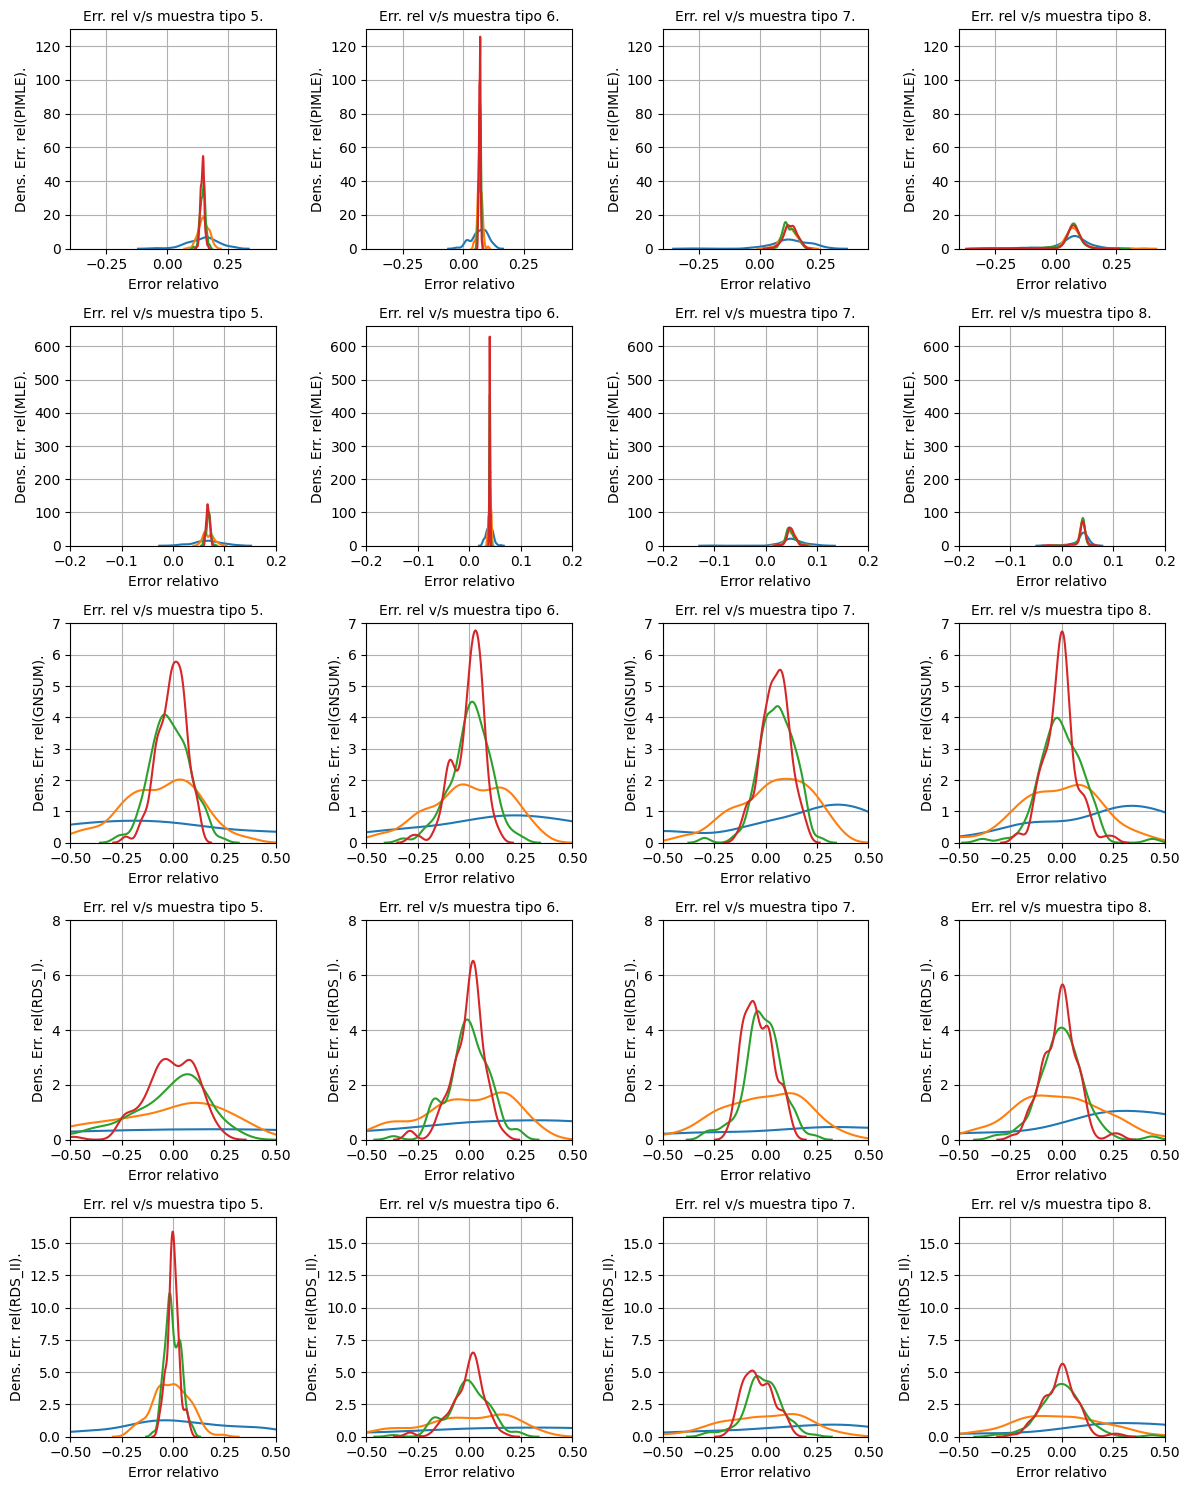

In [90]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,130],[0,660],[0,7],[0,8],[0,17]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=7
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]


l_xlim=[[-0.4, 0.45],[-0.2, 0.2],[-0.5, 0.5],[-0.5, 0.5],[-0.5, 0.5]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

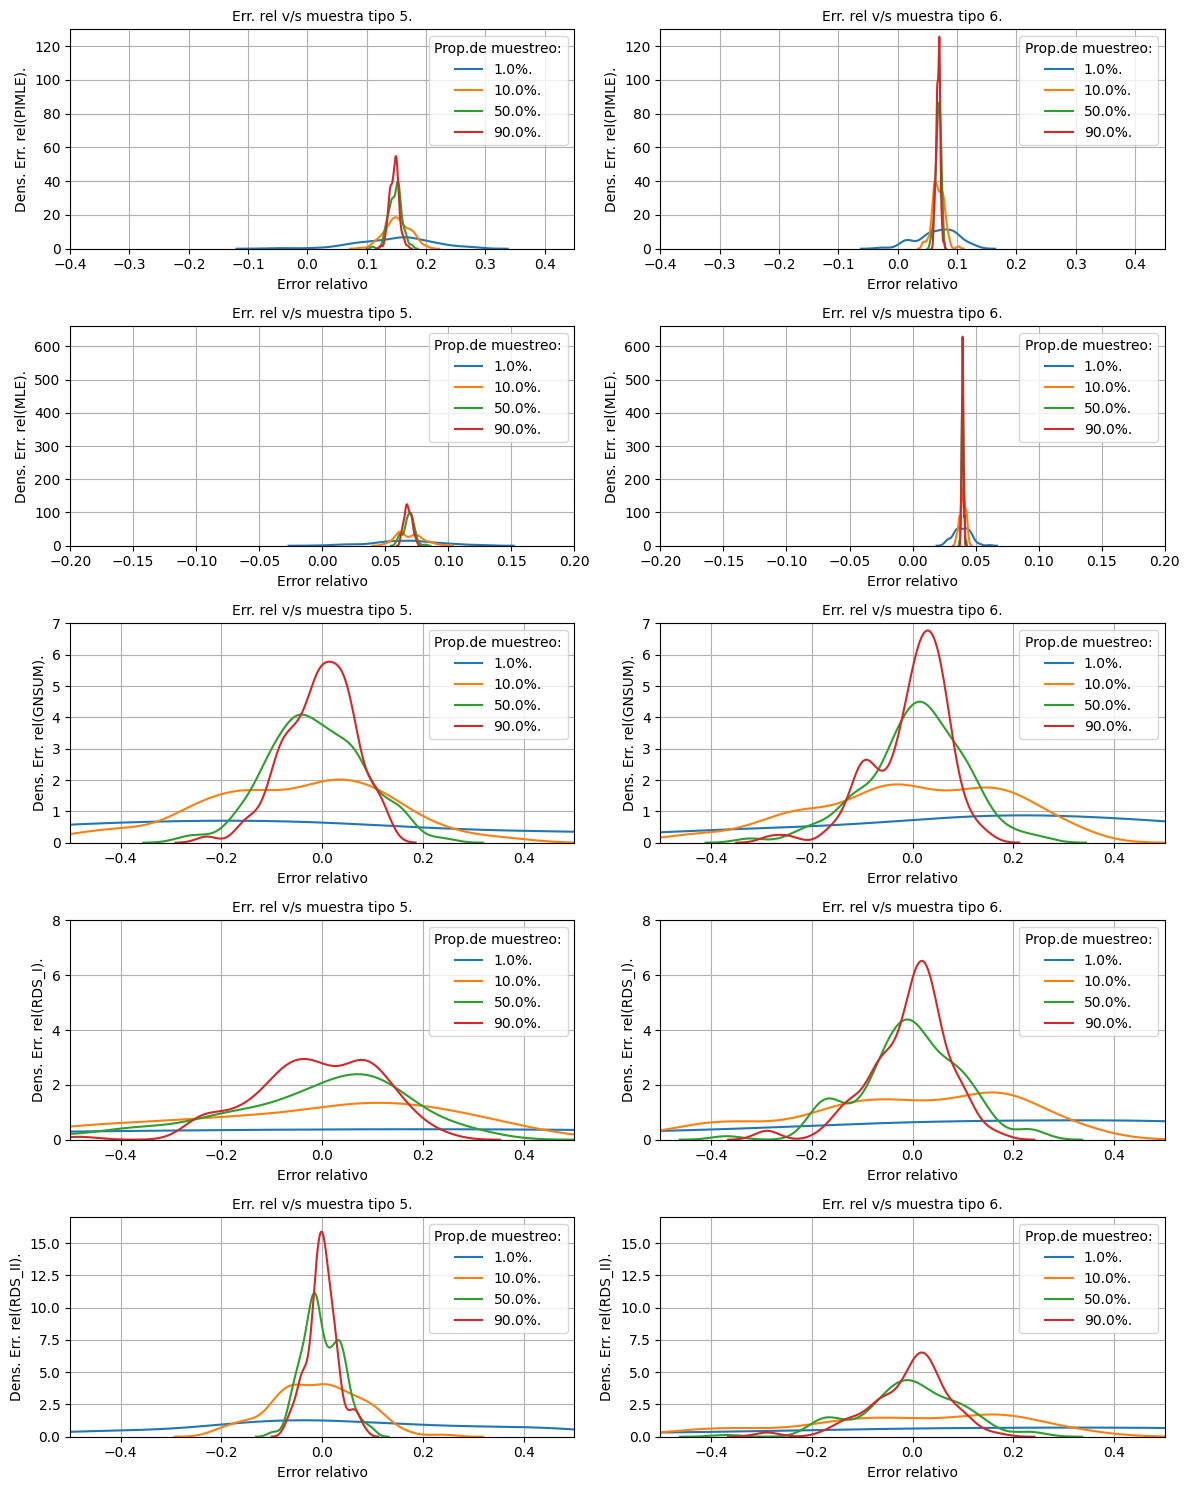

In [91]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,130],[0,660],[0,7],[0,8],[0,17]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=7
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

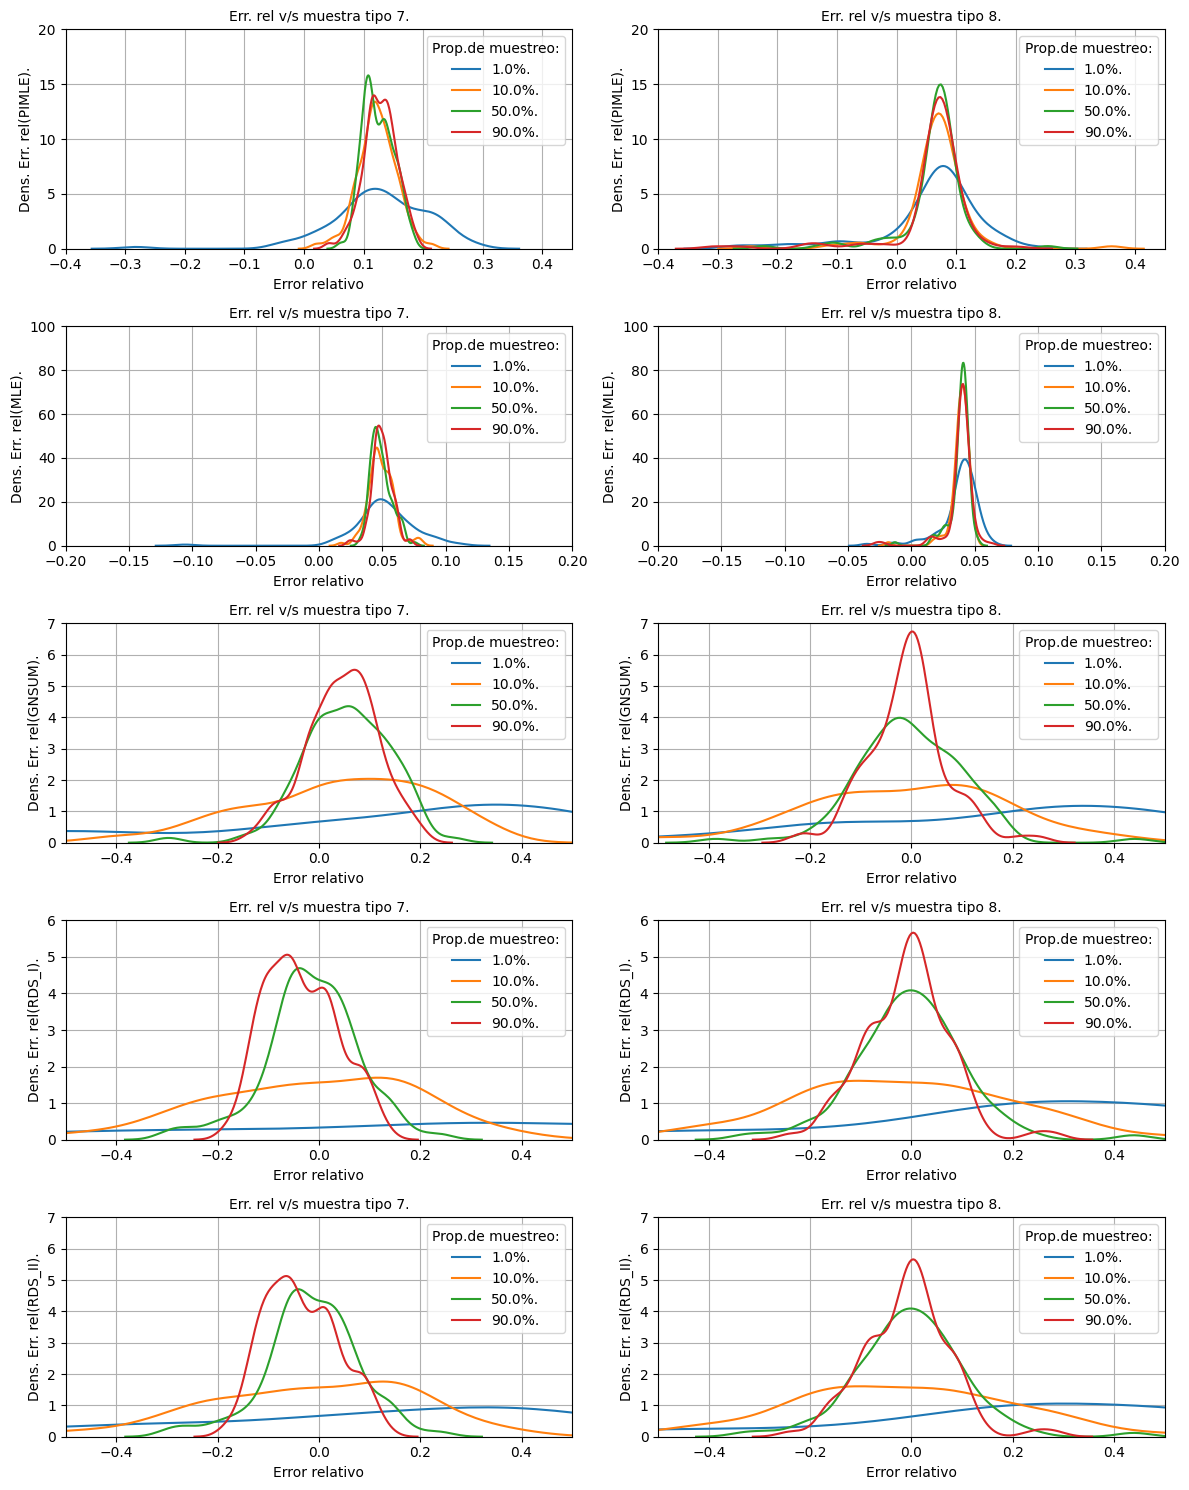

In [92]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,20],[0,100],[0,7],[0,6],[0,7]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=7
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

In [15]:
size_figure=(12,15) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[[0,1600],[0,9000],[0,70],[0,60],[0,160]]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}
act_legend=False

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=0
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
l_xlim=[[-0.04, 0.02],[-0.02, 0.02],[-0.03, 0.03],[-0.04, 0.04],[-0.02, 0.02]]
dict_met_to_xlim={u:v for u,v in zip(L_met_est,l_xlim)}
act_legend=False
graficar_sample_vs_ER(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,dict_met_to_xlim,dict_met_to_ylim,act_legend)

NameError: name 'graficar_sample_vs_ER' is not defined